# IBM Applied Data Science Capstone Project: Finding and Analysing the best suburbs to live in Victoria, Australia

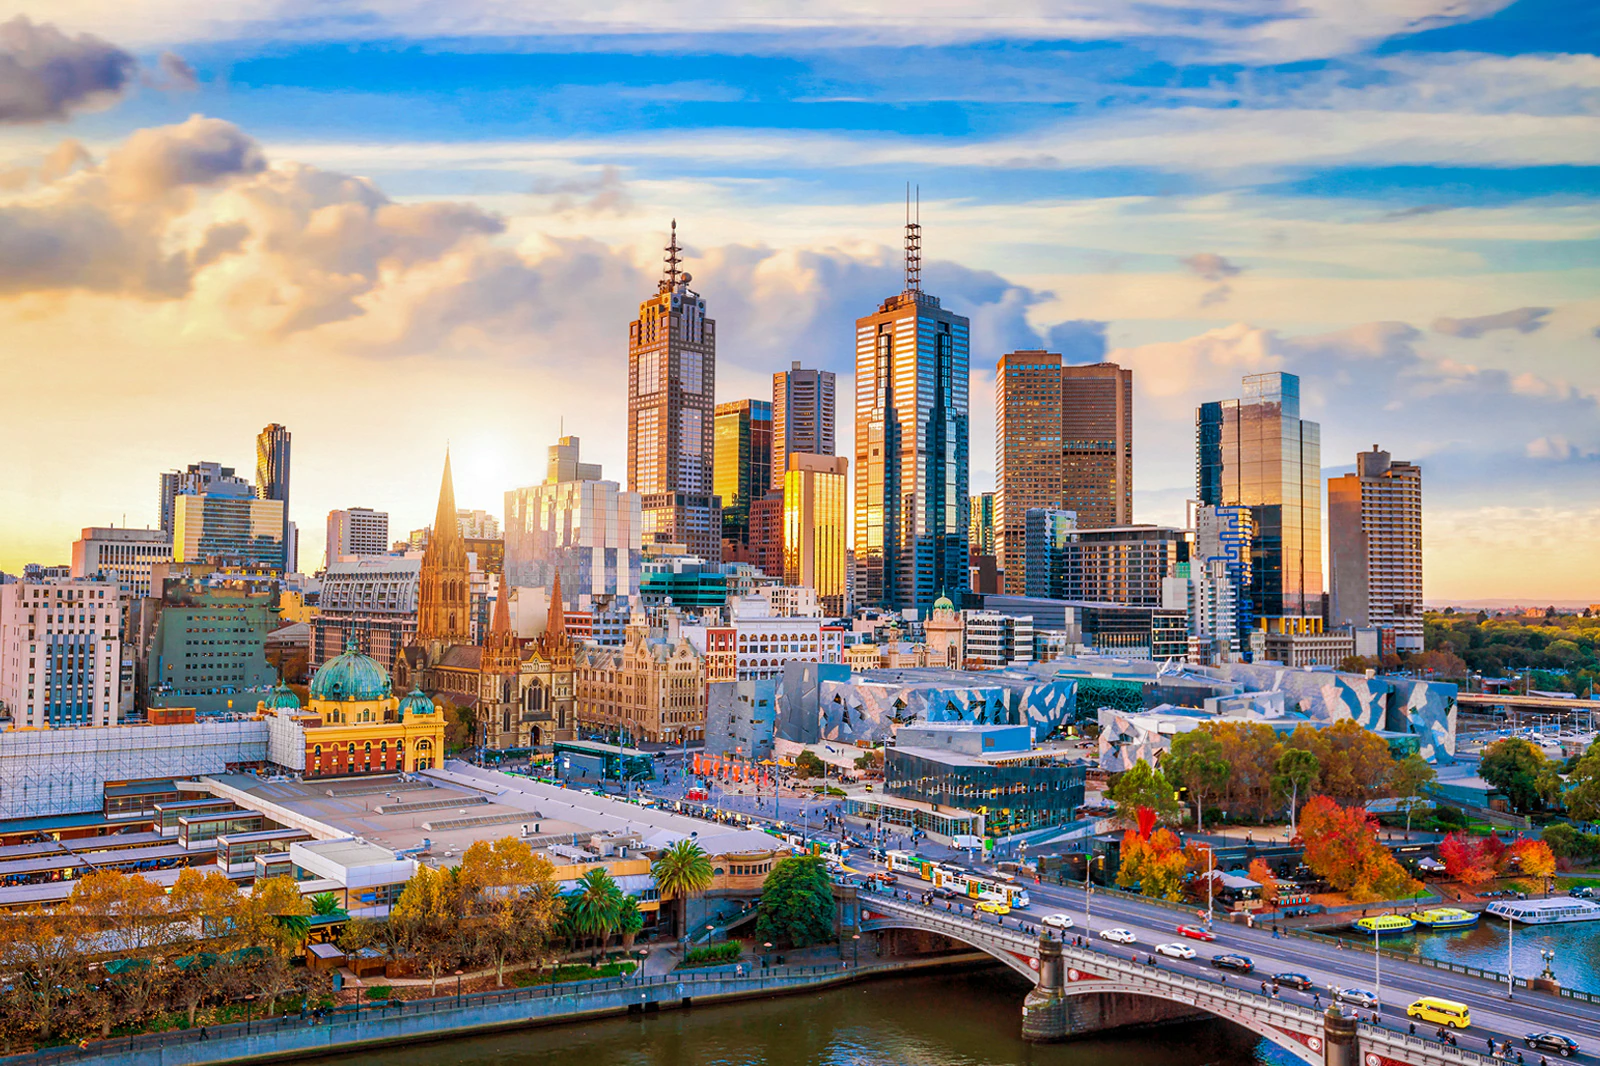

In [1762]:
#from IPython.display import Image
Image(filename=r'C:\Users\mikel\OneDrive\Desktop\02f493f5-ad2f-4aab-aa17-a1d3863a87fc.png')

### Introduction

Our goal is to find and help residents to locate the better suburb to live in. We must consider some factors involved when applying for the search of finding the new home based on customer feedback, service, satisfaction and reviews. For instance such as liveability, parkland, shopping, schools, transport, walkability and healthcare services. To help create better decisions to enjoy a better experience and safety for future residents. 

### Methodology

To tackle on this approach, we need to apply the ten steps to organise the overall Data Science narrative without losing time. Data Science Methodology requires us to collect labelled data implanting analysis, visualisation, statistics and machine learning techinques for better understanding trends or patterns for the suburban data to prepare for Modelling Evaluation to ensure it is deployed to our stakeholders and ventures in business in real-state and conveying. 

### Data Frame
| Column name | Description |
| --- | --- |
| SUBURB | Name of the Suburb |
| liveability | Describes the frame conditions of a decent life for all inhabitants of cities, regions and communities including their physical and mental wellbeing. |
| Shopping | Sale of goods or services to customers through stores or other channels. |
| Schools | To provide for the fullest possible development of each learner for living morally, creatively, and productively in a democratic society. |
| Transport | Take or carry (people or goods) from one place to another by means of a vehicle. |
| Walkability | Contributes to reducing the area dedicated for car transportation and parking, creating compact, accessible economic activity, and job opportunities for local communities |
| Health | Center improvement of health via the prevention, diagnosis, treatment, amelioration or cure of disease, illness, injury, and other physical and mental impairments in people.|
| Latitude| A coordinate that specifies the north–south position of a point on the surface of the Earth or another celestial body |
| Longtitude| A geographic coordinate that specifies the east–west position of a point on the surface of the Earth, or another celestial body. |
| PostCode | Four digit number used by Australia Post to assist with mail delivery. |
| Population_(2021)| Whole number of people or inhabitants in the Suburb. |
| Density_(per km2)| Number of people living in an area per square kilometre |
| Area_(km2)|  SI unit of area  |
| CRIME_RATE| To help address the crime problem at various levels (LOW, AVERAGE and HIGH) |
| PROVERTY_RATE| How well the economy is performing in the particular suburb in levels (LOW,AVERAGE and HIGH)|
| Community| Suburb: An area outside of a principal city of a metropolitan area, which may include commercial and mixed-use, but is primarily a residential area , Urban: High population density and infrastructure of built environment |
| MEDIAN_PRICE_HOUSE| Influence consumer spending, including through the spending that occurs when people move homes or impact on access to finance by small business by affecting the value of collateral for loans. |
| MEDIAN_PRICE_UNIT| Has less potential for capital growth as opposed to houses |


### Contents

1. Importing and Installing the libaries 
2. Reading the dataframe and find out where the file is located
3. Machine Learning

      * 3a. Supervised Learning: Classification 
      * 3b. Supervised Learning: Linear Regression
      * 3c. Supervised Learning: Multiple Linear Regression 
      * 3d. Supervised Learning: Non-Linear Regression Analysis
      * 3e. Supervised Learning: Polynomial Regression
      * 3f. UnSupervised Learning: K-Means Clustering 
      * 3g. UnSupervised Learning: Hierarchical Clustering Density-Based Clustering 
      
4. Data Analysis 

      * 4a. Data Wrangling
      * 4b. Exploratory Data Analysis
      * 4c. Model Development
      * 4d. Model Evaluation and Refinement
      
5. Data Visualisation 

      * 5a. Generating the Map
      * 5b. Plotly Charts


## 1. Importing and installing the libaries 

In [1760]:
!pip install geocoder
!pip install folium==0.7.0
!pip3 install wget

In [1699]:
import itertools
import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
from matplotlib.ticker import NullFormatter
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import os
import wget
import sys
import pylab as pl
import seaborn as sns
import matplotlib.ticker as ticker
import itertools
import ipywidgets as widgets
import sklearn.tree as tree
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import log_loss
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import jaccard_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tqdm import tqdm
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
from sklearn import linear_model
from sklearn.metrics import r2_score
from ipywidgets import interact
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize
from sklearn import preprocessing
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
#from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


## 2. Reading the dataframe and find out where the file is located.

In [1700]:
df = pd.read_excel(r'C:\Users\mikel\OneDrive\Desktop\MelT50Subs.xlsx')
df.head()

SUBURB  liveability  Parkland  Shopping  Schools  Transport  \
0          Fitzory          9.8       8.3       9.8      9.3        8.7   
1          Carlton          9.8       8.1       9.8      9.4        8.8   
2  East Melbourne           9.8       9.4       9.5      6.1        9.7   
3    Fitzory North          9.8       8.4       9.0      9.6        9.1   
4  North Melbourne          9.7       7.6       9.6      9.2        9.3   

   Walkability   Health   Latitude  Longtitude  PostCode  Population_(2021)  \
0           9.7      9.9  -37.7984    144.9785      3065              10431   
1           9.8      9.8  -37.8008    144.9670      3053              16055   
2           9.4      9.6  -37.8103    144.9835      3002               4896   
3           9.6      9.4  -37.7833    144.9838      3068              12781   
4           9.0      9.4  -37.8008    144.9485      3051              14953   

   Density_(per km2)  Area_(km2) CRIME_RATE PROVERTY_RATE Community  \
0        7450.000000         1.4       HIGH          HIGH    Suburb   
1        8919.444444         1.8       HIGH          HIGH     Urban   
2        2580.000000         1.9       HIGH           LOW     Urban   
3        5325.420000         2.4       HIGH          HIGH    Suburb   
4        6230.420000         2.4       HIGH          HIGH     Urban   

   MEDIAN_PRICE_HOUSE  MEDIAN_PRICE_UNIT  
0           1500000.0           794199.0  
1           1600000.0           520000.0  
2           3227500.0           856500.0  
3           1615000.0           656500.0  
4           1300000.0           570000.0

#### Clean NaN values is to compute the average for Median price unit.

In [1701]:
mean_value=df['MEDIAN_PRICE_UNIT'].mean()
mean_value

629549.6458333334

In [1702]:
df['MEDIAN_PRICE_UNIT'].fillna(value=mean_value, inplace=True)
df.head()

SUBURB  liveability  Parkland  Shopping  Schools  Transport  \
0          Fitzory          9.8       8.3       9.8      9.3        8.7   
1          Carlton          9.8       8.1       9.8      9.4        8.8   
2  East Melbourne           9.8       9.4       9.5      6.1        9.7   
3    Fitzory North          9.8       8.4       9.0      9.6        9.1   
4  North Melbourne          9.7       7.6       9.6      9.2        9.3   

   Walkability   Health   Latitude  Longtitude  PostCode  Population_(2021)  \
0           9.7      9.9  -37.7984    144.9785      3065              10431   
1           9.8      9.8  -37.8008    144.9670      3053              16055   
2           9.4      9.6  -37.8103    144.9835      3002               4896   
3           9.6      9.4  -37.7833    144.9838      3068              12781   
4           9.0      9.4  -37.8008    144.9485      3051              14953   

   Density_(per km2)  Area_(km2) CRIME_RATE PROVERTY_RATE Community  \
0        7450.000000         1.4       HIGH          HIGH    Suburb   
1        8919.444444         1.8       HIGH          HIGH     Urban   
2        2580.000000         1.9       HIGH           LOW     Urban   
3        5325.420000         2.4       HIGH          HIGH    Suburb   
4        6230.420000         2.4       HIGH          HIGH     Urban   

   MEDIAN_PRICE_HOUSE  MEDIAN_PRICE_UNIT  
0           1500000.0           794199.0  
1           1600000.0           520000.0  
2           3227500.0           856500.0  
3           1615000.0           656500.0  
4           1300000.0           570000.0

In [1703]:
#Same for the median price house.
mean_value=df['MEDIAN_PRICE_HOUSE'].mean()
mean_value

1816021.7391304348

In [1704]:
df['MEDIAN_PRICE_HOUSE'].fillna(value=mean_value, inplace=True)
df.head()

SUBURB  liveability  Parkland  Shopping  Schools  Transport  \
0          Fitzory          9.8       8.3       9.8      9.3        8.7   
1          Carlton          9.8       8.1       9.8      9.4        8.8   
2  East Melbourne           9.8       9.4       9.5      6.1        9.7   
3    Fitzory North          9.8       8.4       9.0      9.6        9.1   
4  North Melbourne          9.7       7.6       9.6      9.2        9.3   

   Walkability   Health   Latitude  Longtitude  PostCode  Population_(2021)  \
0           9.7      9.9  -37.7984    144.9785      3065              10431   
1           9.8      9.8  -37.8008    144.9670      3053              16055   
2           9.4      9.6  -37.8103    144.9835      3002               4896   
3           9.6      9.4  -37.7833    144.9838      3068              12781   
4           9.0      9.4  -37.8008    144.9485      3051              14953   

   Density_(per km2)  Area_(km2) CRIME_RATE PROVERTY_RATE Community  \
0        7450.000000         1.4       HIGH          HIGH    Suburb   
1        8919.444444         1.8       HIGH          HIGH     Urban   
2        2580.000000         1.9       HIGH           LOW     Urban   
3        5325.420000         2.4       HIGH          HIGH    Suburb   
4        6230.420000         2.4       HIGH          HIGH     Urban   

   MEDIAN_PRICE_HOUSE  MEDIAN_PRICE_UNIT  
0           1500000.0           794199.0  
1           1600000.0           520000.0  
2           3227500.0           856500.0  
3           1615000.0           656500.0  
4           1300000.0           570000.0

 Finding out the shape of the dataframe

In [1705]:
df.shape

(50, 19)

## 3. Machine Learning 

## 3a. Supervised Learning: Classification

### One Hot Encoding

 How about Poverty Rate?

In [1706]:
df.groupby(['PROVERTY_RATE'])['Community'].value_counts(normalize=True)

PROVERTY_RATE  Community
AVERAGE        Suburb       0.500000
               Urban        0.500000
HIGH           Suburb       0.636364
               Urban        0.363636
LOW            Suburb       0.878788
               Urban        0.121212
Name: Community, dtype: float64

Crime Rate?

In [1707]:
df.groupby(['CRIME_RATE'])['Community'].value_counts(normalize=True)

CRIME_RATE  Community
AVERAGE     Suburb       1.000000
HIGH        Suburb       0.736842
            Urban        0.263158
LOW         Suburb       0.888889
            Urban        0.111111
Name: Community, dtype: float64

Best to use Proverty Rate for more accurate predictions 

### Features before One Hot Encoding

#### Note: Add in white space for Walkability and Health to properly run the df.

In [1708]:
df[['liveability','Parkland','Shopping','Schools','Transport','Walkability ','Health ','CRIME_RATE','PROVERTY_RATE','Community']].head()

liveability  Parkland  Shopping  Schools  Transport  Walkability   Health   \
0          9.8       8.3       9.8      9.3        8.7           9.7      9.9   
1          9.8       8.1       9.8      9.4        8.8           9.8      9.8   
2          9.8       9.4       9.5      6.1        9.7           9.4      9.6   
3          9.8       8.4       9.0      9.6        9.1           9.6      9.4   
4          9.7       7.6       9.6      9.2        9.3           9.0      9.4   

  CRIME_RATE PROVERTY_RATE Community  
0       HIGH          HIGH    Suburb  
1       HIGH          HIGH     Urban  
2       HIGH           LOW     Urban  
3       HIGH          HIGH    Suburb  
4       HIGH          HIGH     Urban

### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame.

In [1709]:
Feature = df[['liveability','Parkland','Shopping','Schools','Transport','Walkability ','Health ']]
Feature = pd.concat([Feature,pd.get_dummies(df['PROVERTY_RATE'])], axis=1)
Feature.head()

liveability  Parkland  Shopping  Schools  Transport  Walkability   Health   \
0          9.8       8.3       9.8      9.3        8.7           9.7      9.9   
1          9.8       8.1       9.8      9.4        8.8           9.8      9.8   
2          9.8       9.4       9.5      6.1        9.7           9.4      9.6   
3          9.8       8.4       9.0      9.6        9.1           9.6      9.4   
4          9.7       7.6       9.6      9.2        9.3           9.0      9.4   

   AVERAGE  HIGH  LOW  
0        0     1    0  
1        0     1    0  
2        0     0    1  
3        0     1    0  
4        0     1    0

### Feature Selection

Let's define feature sets, X:

In [1710]:
X = Feature
X.head()

liveability  Parkland  Shopping  Schools  Transport  Walkability   Health   \
0          9.8       8.3       9.8      9.3        8.7           9.7      9.9   
1          9.8       8.1       9.8      9.4        8.8           9.8      9.8   
2          9.8       9.4       9.5      6.1        9.7           9.4      9.6   
3          9.8       8.4       9.0      9.6        9.1           9.6      9.4   
4          9.7       7.6       9.6      9.2        9.3           9.0      9.4   

   AVERAGE  HIGH  LOW  
0        0     1    0  
1        0     1    0  
2        0     0    1  
3        0     1    0  
4        0     1    0

Our labels,

In [1711]:
df['Community'].replace(to_replace=['Urban','Suburb'], value = [0,1], inplace = True)
y = df['Community'].values
y[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

### Normalize Data

In [1712]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.57,  1.07,  1.37,  1.1 ,  0.21,  1.32,  1.48, -0.37,  1.88,
        -1.39],
       [ 1.57,  0.97,  1.37,  1.16,  0.33,  1.4 ,  1.37, -0.37,  1.88,
        -1.39],
       [ 1.57,  1.62,  1.08, -0.85,  1.42,  1.07,  1.15, -0.37, -0.53,
         0.72],
       [ 1.57,  1.12,  0.61,  1.29,  0.7 ,  1.23,  0.93, -0.37,  1.88,
        -1.39],
       [ 1.41,  0.72,  1.18,  1.04,  0.94,  0.75,  0.93, -0.37,  1.88,
        -1.39]])

### Using the classification Models

 Use the training set and test set to build an accurate model.

### K Nearest Neighbor (KNN)

In [1713]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (40, 10) (40,)
Test set: (10, 10) (10,)


#### Training 

Let's start the algorithm with k=4:

In [1714]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

#### Predicting 

We can use the model to make predictions on the test set:

In [1715]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 1, 0, 0, 1], dtype=int64)

#### Accuracy evaluation

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [1716]:

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.85
Test set Accuracy:  0.7


### Alternative method (To ensure how accurate the K-neighbourhoods are there)

In [1717]:

trainScores={}
bestScore=0.0
accList=[]

for k in range(3,12):
    
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    # using 10 fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, X, y, cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn=best_clf

Best K is : 4 | Cross validation Accuracy : 0.78


In [1718]:
clf_knn.fit(X_train,y_train)
y_pred=best_clf.predict(X_train)

In [1719]:

trainScores['KNN-jaccard']=jaccard_score(y_train, y_pred)
trainScores['KNN-f1-score']=f1_score(y_train, y_pred, average='weighted') 

In [1720]:
trainScores

{'KNN-jaccard': 0.8285714285714286, 'KNN-f1-score': 0.85}

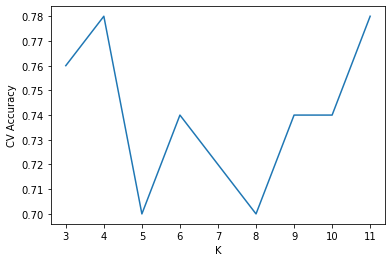

In [1721]:
plt.plot(range(3,12),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

### Decision Tree

Printing the shape of X_trainset and y_trainset. Ensure that the dimensions match.

In [1722]:
print('Shape of X training set {}'.format(X_train.shape),'&',' Size of Y training set {}'.format(y_train.shape))

Shape of X training set (40, 10) &  Size of Y training set (40,)


Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [1723]:

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [1724]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Prediction

Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [1725]:
predTree = drugTree.predict(X_test)

You can print out predTree and y_testset if you want to visually compare the predictions to the actual values.

In [1726]:
print (predTree [0:5])
print (y_test [0:5])

[0 1 1 1 1]
[1 1 0 0 1]


### Evaluation

Next, let's import metrics from sklearn and check the accuracy of our model.

In [1727]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6


#### Jaccard 

In [1728]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, predTree,pos_label=1)

0.6

#### f1-Score

In [1729]:
from sklearn.metrics import f1_score
f1_score(y_test, predTree, average='weighted')

0.525

### Visualisation

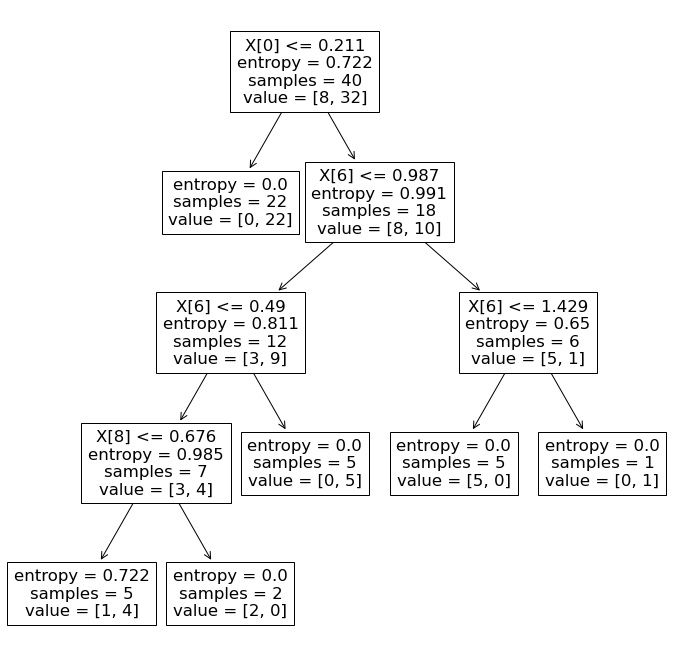

In [1730]:
plt.figure(figsize=(12,12))
tree.plot_tree(drugTree)
plt.show()

### Support Vector Machine 

Modeling (SVM with Scikit-learn)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

* 1.Linear 
* 2.Polynomial
* 3.Radial basis function (RBF) 
* 4.Sigmoid

In [1731]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

After being fitted, the model can then be used to predict new values:

In [1732]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

#### Evaluation

In [1733]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.70      1.00      0.82         7

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10

Confusion matrix, without normalization
[[0 3]
 [0 7]]


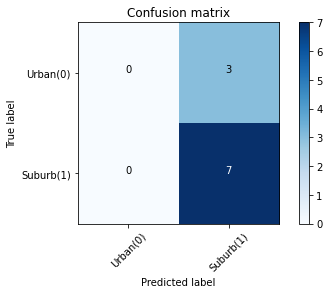

In [1734]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Urban(0)','Suburb(1)'],normalize= False,  title='Confusion matrix')

You can also easily use the f1_score from sklearn library:

In [1735]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.5764705882352941

Let's try the jaccard index for accuracy.

In [1736]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.7

### Logistic Regression

Modeling (Logistic Regression with Scikit-learn)

Let's build our model using LogisticRegression from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now let's fit our model with train set:

In [1737]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Now we can predict using our test set:

In [1738]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [1739]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.57, 0.43],
       [0.38, 0.62],
       [0.54, 0.46],
       [0.57, 0.43],
       [0.51, 0.49],
       [0.49, 0.51],
       [0.54, 0.46],
       [0.47, 0.53],
       [0.47, 0.53],
       [0.5 , 0.5 ]])

### Evaluation

#### jaccard index

Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [1740]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1) 

0.375

#### f1-score

In [1741]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.5151515151515151

#### Confusion Matrix

In [1742]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0,1]))

[[2 1]
 [4 3]]


              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.75      0.43      0.55         7

    accuracy                           0.50        10
   macro avg       0.54      0.55      0.49        10
weighted avg       0.62      0.50      0.52        10

Confusion matrix, without normalization
[[2 1]
 [4 3]]


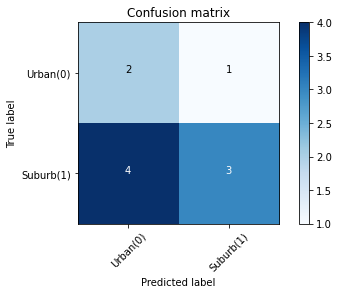

In [1743]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Urban(0)','Suburb(1)'],normalize= False,  title='Confusion matrix')

In [1744]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.75      0.43      0.55         7

    accuracy                           0.50        10
   macro avg       0.54      0.55      0.49        10
weighted avg       0.62      0.50      0.52        10



#### log loss

Now, let's try log loss for evaluation. In logistic regression, the output can be the probability of Suburb is yes (equals to 1). This probability is a value between 0 and 1. Log loss (Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [1745]:
from sklearn.metrics import log_loss

logreg_cv_best_score = log_loss(y_test, yhat_prob)
logreg_cv_best_score

0.6761515181088067

### Find the method that works best

In [1746]:
tree_cv_best_score_ = metrics.accuracy_score(y_test, predTree)
tree_cv_best_score_

0.6

In [1747]:
knn_cv_best_score_ = bestScore
knn_cv_best_score_

0.78

In [1748]:
algorithms = {'KNN':knn_cv_best_score_,'Tree':tree_cv_best_score_,'LogisticRegression':logreg_cv_best_score}

In [1749]:
clf_knn=best_clf
clf_knn

KNeighborsClassifier(n_neighbors=4)

In [1750]:
bestalgorithm = max(algorithms, key=algorithms.get)

print('Best Algorithm is',bestalgorithm,'with a score of',algorithms[bestalgorithm])
if bestalgorithm == 'Tree':
    print('Best Params is :',tree_cv_best_score_)
if bestalgorithm == 'KNN':
    print('Best Params is :',knn_cv_best_score_)
if bestalgorithm == 'LogisticRegression':
    print('Best Params is :',logreg_cv_best_score)

Best Algorithm is KNN with a score of 0.78
Best Params is : 0.78


In [1751]:
algorithms

{'KNN': 0.78, 'Tree': 0.6, 'LogisticRegression': 0.6761515181088067}

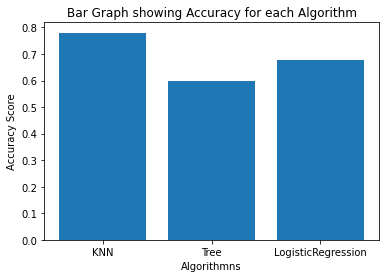

In [1752]:
plt.bar(algorithms.keys(), algorithms.values())
plt.title("Bar Graph showing Accuracy for each Algorithm")
plt.ylabel("Accuracy Score")
plt.xlabel("Algorithmns")
plt.show()

### Report
| Algorithm | Jaccard | f1-Score  | log-loss |
| --- | --- | --- | --- |
| KNN | 0.83 |  0.85 | NA |
| Decision Tree| 0.6 | 0.525  | NA|
| SVM| 0.7 | 0.57  | NA|
| LogisticRegression| 0.375 | 0.52  | 0.68|


### Machine Learning Prediction

Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [1301]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [1302]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params and the accuracy on the validation data using the data attribute best_score.

In [1303]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.78


Calculate the accuracy on the test data using the method score:

In [1304]:
test_score = logreg_cv.score(X_test, y_test)
test_score

0.7

Let's look at the confusion matrix:

In [1305]:
yhat=logreg_cv.predict(X_test)

This function is to plot the confusion matrix.

In [1306]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Urban', 'Suburb']); ax.yaxis.set_ticklabels(['Urban', 'Suburb'])

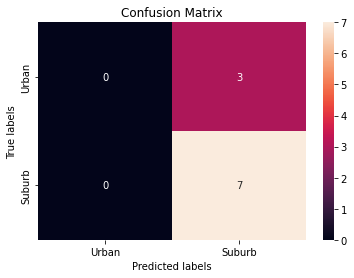

In [1307]:
plot_confusion_matrix(y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the major problem is false positives.

Create a support vector machine object then create a GridSearchCV object svm_cv with cv - 10. Fit the object to find the best parameters from the dictionary parameters.

In [1308]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [1309]:
svm_cv = GridSearchCV(svm, parameters, cv=10).fit(X_train, y_train)

In [1310]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 1.0, 'kernel': 'sigmoid'}
accuracy : 0.825


Calculate the accuracy on the test data using the method score:

In [1311]:
test_score_svm = svm_cv.score(X_test, y_test)
test_score_svm

0.7

We can plot the confusion matrix

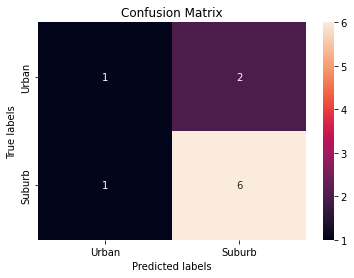

In [1312]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [1313]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [1314]:
tree_cv = GridSearchCV(tree, parameters, cv = 10).fit(X_train, y_train)
tree_cv

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [1315]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.9


Calculate the accuracy of tree_cv on the test data using the method score:

In [1316]:
test_score_tree = tree_cv.score(X_test, y_test)
test_score_tree

0.6

We can plot the confusion matrix

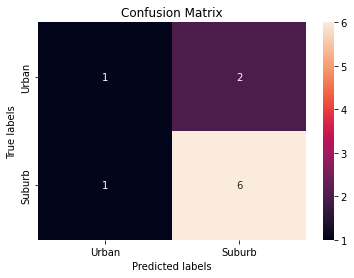

In [1317]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [1318]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [1319]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10).fit(X_train, y_train)
knn_cv

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [1320]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1}
accuracy : 0.8


In [1321]:
test_score_knn = knn_cv.score(X_test, y_test)
test_score_knn

0.6

We can plot the confusion matrix

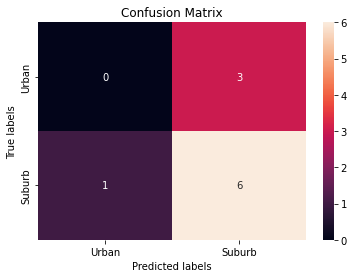

In [1322]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

### Find the Method that works best

In [1323]:
algorithms = {'KNN':knn_cv.best_score_,'Tree':tree_cv.best_score_,'LogisticRegression':logreg_cv.best_score_}
bestalgorithm = max(algorithms, key=algorithms.get)

print('Best Algorithm is',bestalgorithm,'with a score of',algorithms[bestalgorithm])
if bestalgorithm == 'Tree':
    print('Best Params is :',tree_cv.best_params_)
if bestalgorithm == 'KNN':
    print('Best Params is :',knn_cv.best_params_)
if bestalgorithm == 'LogisticRegression':
    print('Best Params is :',logreg_cv.best_params_)

Best Algorithm is Tree with a score of 0.9
Best Params is : {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}


In [1324]:
algorithms

{'KNN': 0.8, 'Tree': 0.9, 'LogisticRegression': 0.78}

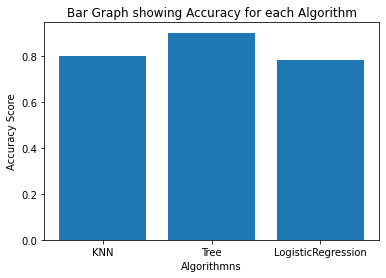

In [1325]:
plt.bar(algorithms.keys(), algorithms.values())
plt.title("Bar Graph showing Accuracy for each Algorithm")
plt.ylabel("Accuracy Score")
plt.xlabel("Algorithmns")
plt.show()

## 3b. Supervised Learning: Linear Regression

### Data Exploration

In [1326]:
df.drop(["SUBURB","Latitude","Longtitude","PostCode","CRIME_RATE","PROVERTY_RATE" ,"Community"], axis=1, inplace=True)
df.describe()

liveability   Parkland   Shopping    Schools  Transport  Walkability   \
count    50.000000  50.000000  50.000000  50.000000  50.000000     50.000000   
mean      8.818000   6.142000   8.368000   7.496000   8.524000      8.082000   
std       0.632033   2.033805   1.054522   1.651216   0.836065      1.241738   
min       7.800000   2.100000   6.000000   1.700000   6.400000      3.800000   
25%       8.125000   4.225000   7.625000   6.625000   8.000000      7.700000   
50%       8.900000   6.250000   8.500000   7.500000   8.650000      8.250000   
75%       9.375000   7.575000   9.200000   8.575000   9.200000      8.900000   
max       9.800000   9.400000   9.800000   9.800000   9.800000      9.800000   

         Health   Population_(2021)  Density_(per km2)  Area_(km2)  \
count  50.000000          50.000000          50.000000   50.000000   
mean    8.556000       13326.960000        5169.067517    3.104800   
std     0.914991       10052.047585        4260.394732    2.379034   
min     6.300000         842.000000        1254.000000    0.300000   
25%     8.025000        6266.500000        3294.739113    1.325000   
50%     8.650000       11474.000000        4526.282500    2.500000   
75%     9.350000       17849.000000        5847.646500    4.300000   
max     9.900000       54941.000000       30690.000000   11.300000   

       MEDIAN_PRICE_HOUSE  MEDIAN_PRICE_UNIT  
count        5.000000e+01       5.000000e+01  
mean         1.816022e+06       6.295496e+05  
std          6.126530e+05       1.467573e+05  
min          1.010000e+06       3.400000e+05  
25%          1.399250e+06       5.520000e+05  
50%          1.673000e+06       6.025000e+05  
75%          1.841505e+06       6.565000e+05  
max          3.975000e+06       1.322500e+06

Let's select some features to explore more.

In [1327]:
cdf = df[['liveability','Parkland','Shopping','Schools','Transport','Walkability ','Health ','Density_(per km2)']]

We can plot each of these features:

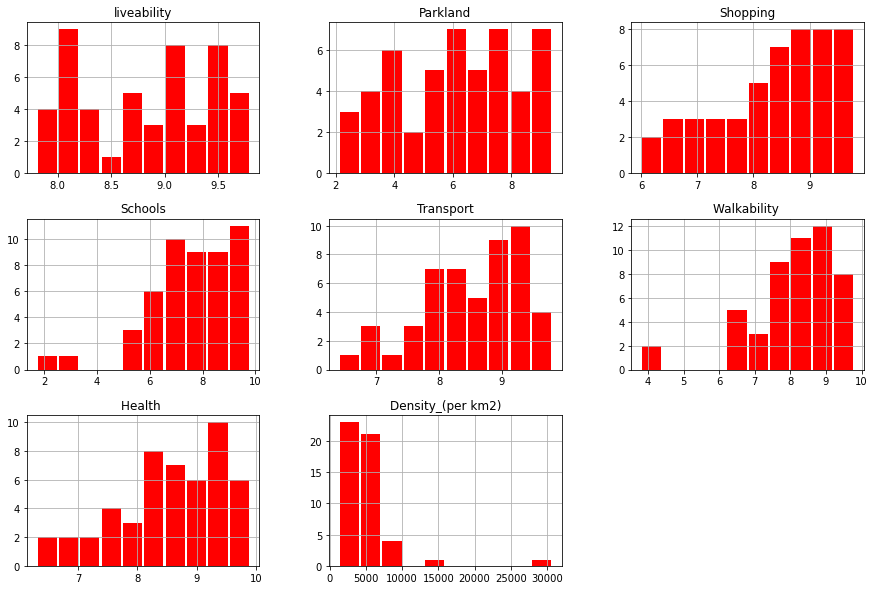

In [1328]:
viz = cdf
viz.hist(grid=True, rwidth = 0.9, color ='red', figsize=(15,10))
plt.show()



Now, let's plot each of these features against Liveability, to see how linear their relationship is:

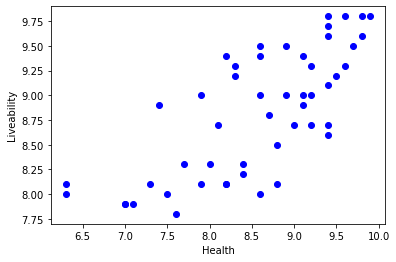

In [1329]:
plt.scatter(cdf['Health '], cdf['liveability'],  color='blue')
plt.xlabel("Health")
plt.ylabel("Liveability")
plt.show()

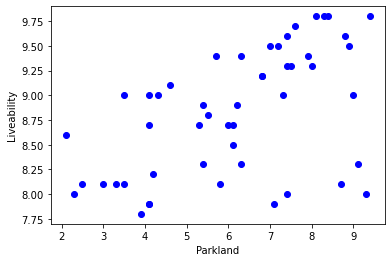

In [1330]:
plt.scatter(cdf['Parkland'], cdf['liveability'],  color='blue')
plt.xlabel("Parkland")
plt.ylabel("Liveability")
plt.show()

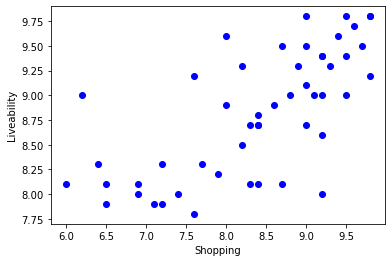

In [1331]:
plt.scatter(cdf['Shopping'], cdf['liveability'],  color='blue')
plt.xlabel("Shopping")
plt.ylabel("Liveability")
plt.show()

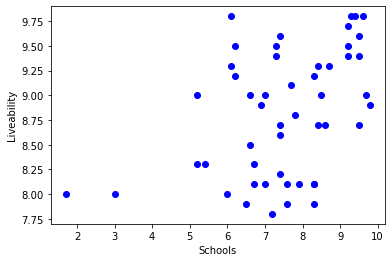

In [1332]:
plt.scatter(cdf['Schools'], cdf['liveability'],  color='blue')
plt.xlabel("Schools")
plt.ylabel("Liveability")
plt.show()

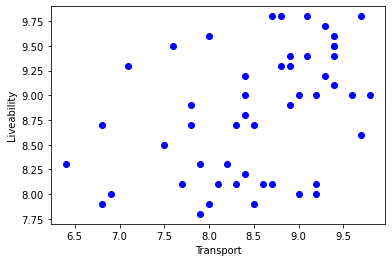

In [1333]:
plt.scatter(cdf['Transport'], cdf['liveability'],  color='blue')
plt.xlabel("Transport")
plt.ylabel("Liveability")
plt.show()

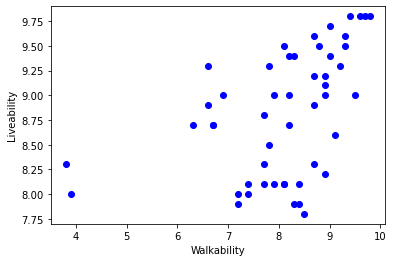

In [1334]:
plt.scatter(cdf['Walkability '], cdf['liveability'],  color='blue')
plt.xlabel("Walkability")
plt.ylabel("Liveability")
plt.show()

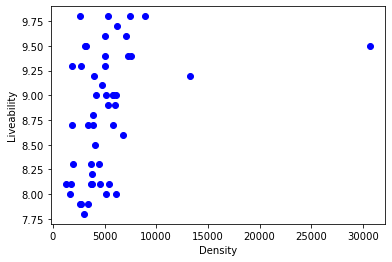

In [1335]:
plt.scatter(cdf['Density_(per km2)'], cdf['liveability'], color='blue')
plt.xlabel("Density")
plt.ylabel("Liveability")
plt.show()

#### Creating train and test dataset

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [1336]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

#### Train data distribution

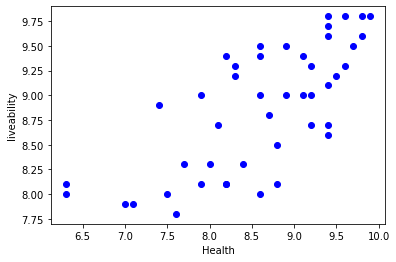

In [1337]:
plt.scatter(train['Health '], train['liveability'],  color='blue')
plt.xlabel('Health')
plt.ylabel('liveability')
plt.show()

#### Modeling

Using sklearn package to model data see 1.Importing and Installing the libaries

In [1338]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Health ']])
train_y = np.asanyarray(train[['liveability']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.5]]
Intercept:  [4.53]


 Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

#### Plot outputs

We can plot the fit line over the data:

Text(0, 0.5, 'liveability')

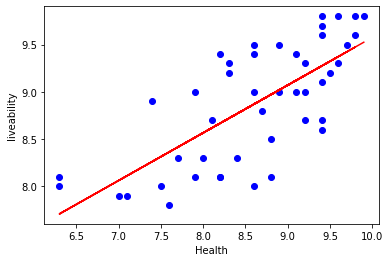

In [1339]:
plt.scatter(train[['Health ']], train[['liveability']],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Health")
plt.ylabel("liveability")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

Root Mean Squared Error (RMSE).

R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [1340]:
## from sklearn.metrics import r2_score (see Section 1)

In [1341]:
test_x = np.asanyarray(test[['Health ']])
test_y = np.asanyarray(test[['liveability']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.29
Residual sum of squares (MSE): 0.11
R2-score: 0.23


NOTE: This may vary whether or not we should add more explanaotry variables to fit the data more nicely.

 ## 3c. Supervised Learning: Multiple Linear Regression

In reality, there are multiple variables that impact the liveability in Victorian Suburbs. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting livability using the features Parkland, Shopping, Schools, Transport, Walkability, Health and Density. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.


In [1342]:
### from sklearn import linear_model

In [1343]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Parkland','Shopping','Schools','Transport','Walkability ','Health ','Density_(per km2)']])
y = np.asanyarray(train[['liveability']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[1.87e-01 1.28e-01 1.12e-01 2.37e-01 3.26e-03 2.21e-01 3.66e-06]]


As mentioned before, Coefficient and Intercept are the parameters of the fitted line. Given that it is a multiple linear regression model with 7 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output (
) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

Solving the model parameters analytically using closed-form equations
Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

### Prediction

In [1344]:
y_hat= regr.predict(test[['Parkland','Shopping','Schools','Transport','Walkability ','Health ','Density_(per km2)']])
x = np.asanyarray(test[['Parkland','Shopping','Schools','Transport','Walkability ','Health ','Density_(per km2)']])
y = np.asanyarray(test[['liveability']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.01
Variance score: 0.92


Explained variance regression score:Let 
be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows: The best possible score is 1.0, the lower values are worse.

#### 1 - (Var(y)-y.hat)/(Var(y))

## 3d. Supervised Learning: Non Linear Regression Analysis

Plotting the data-set

### It kind of looks like an either logistic or exponential function. For example here, we compare Health and Liveability

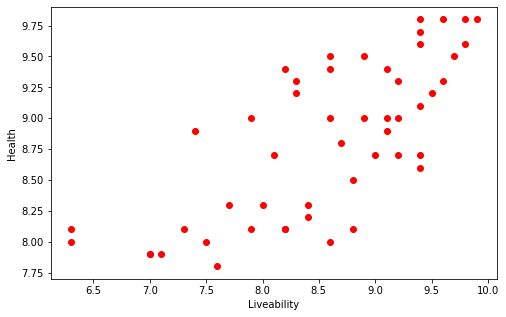

In [1345]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Health "].values, df["liveability"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Health')
plt.xlabel('Liveability')
plt.show()

#### Building The Model

Now, let's build our regression model and initialize its parameters.

In [1346]:
def sigmoid(x, Beta_0, Beta_1):
     y = 1 / (1 + np.exp(-Beta_0*(x-Beta_1)))
     return y

Beta_0: Controls the curve's steepness

Beta_1: Slides the curve on the x-axis.

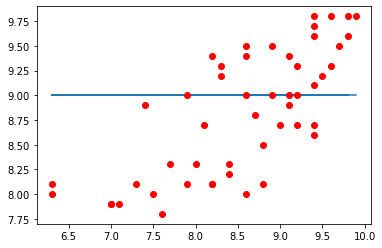

In [1347]:
beta_0 =4.78
beta_1 = 0.47

#logistic function
Y_pred = sigmoid(x_data, beta_0 , beta_1)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*9)
plt.plot(x_data, y_data, 'ro')

Finding the best parameters for our model. Lets first normalize our x and y:

In [1348]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### How we find the best parameters for our fit line?

We can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data. Optimize values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.

In [1349]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_0 = %f, beta_1 = %f" % (popt[0], popt[1]))

 beta_0 = 4.545562, beta_1 = 0.369061


Now we plot our resulting regression model.

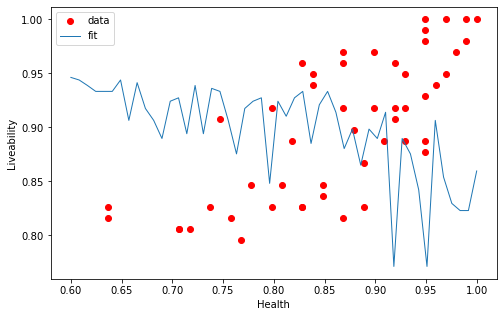

In [1350]:
x = np.linspace(6, 10, 50)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(xdata, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=1.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Liveability')
plt.xlabel('Health')
plt.show()

The accuracy of our model 

In [1351]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.38


#### Let's try another model we can best fit in the model. Walkability vs. Liveability

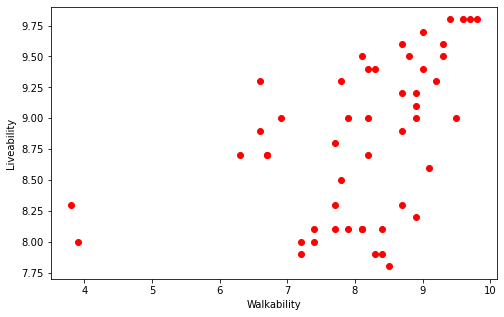

In [1352]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Walkability "].values, df["liveability"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Liveability ')
plt.xlabel('Walkability')
plt.show()

In [1353]:
### Finding the coefficents for beta_0 and beta_1. 
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Walkability ']])
train_y = np.asanyarray(train[['liveability']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.24]]
Intercept:  [6.93]


In [1354]:
def sigmoid(x, Beta_0, Beta_1):
     y = 1 / (1 + np.exp(-Beta_0*(x-Beta_1)))
     return y

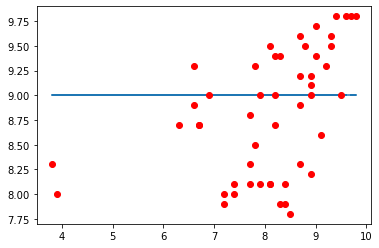

In [1355]:
beta_0 = 6.89
beta_1 = 0.24

#logistic function
Y_pred = sigmoid(x_data, beta_0 , beta_1)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*9)
plt.plot(x_data, y_data, 'ro')

In [1356]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [1357]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_0 = %f, beta_1 = %f" % (popt[0], popt[1]))

 beta_0 = 1.860248, beta_1 = -0.363145


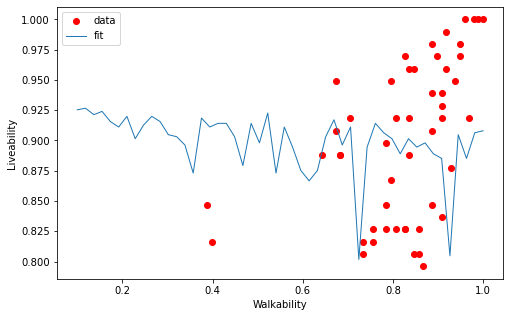

In [1358]:
x = np.linspace(1, 10, 50)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(xdata, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=1.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Liveability')
plt.xlabel('Walkability')
plt.show()

In [1359]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.04


#### Try Density vs. Liveability

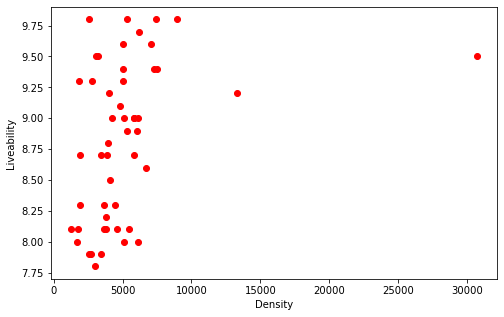

In [1360]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Density_(per km2)"].values, df["liveability"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Liveability ')
plt.xlabel('Density')
plt.show()

In [1361]:
### Finding the coefficents for beta_0 and beta_1. 
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["Density_(per km2)"]])
train_y = np.asanyarray(train[['liveability']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[4.72e-05]]
Intercept:  [8.62]


In [1362]:
def sigmoid(x, Beta_0, Beta_1):
     y = 1 / (1 + np.exp(-Beta_0*(x-Beta_1)))
     return y

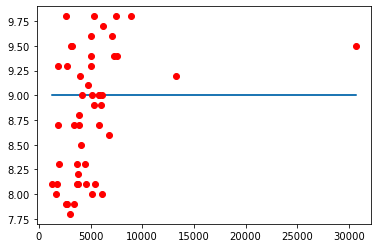

In [1363]:
beta_0 = 8.61
beta_1 = 3.8e-05

#logistic function
Y_pred = sigmoid(x_data, beta_0 , beta_1)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*9)
plt.plot(x_data, y_data, 'ro')

In [1364]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_0 = %f, beta_1 = %f" % (popt[0], popt[1]))

 beta_0 = 4.871750, beta_1 = -0.304109


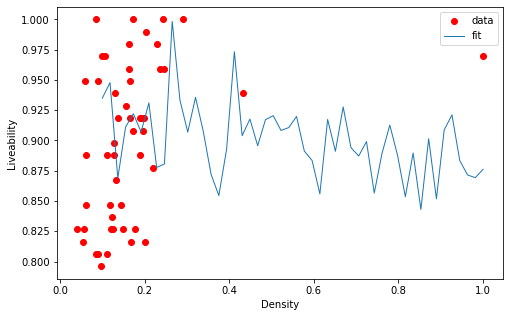

In [1365]:
x = np.linspace(1, 10, 50)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(xdata, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=1.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Liveability')
plt.xlabel('Density')
plt.show()

In [1366]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat))

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.26


#### Transport vs. Liveability

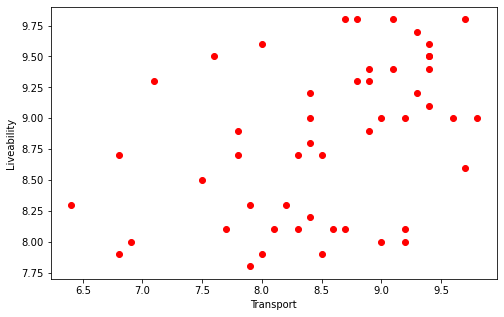

In [1367]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Transport"].values, df["liveability"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Liveability ')
plt.xlabel('Transport')
plt.show()

In [1368]:
### Finding the coefficents for beta_0 and beta_1. 
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["Transport"]])
train_y = np.asanyarray(train[['liveability']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.29]]
Intercept:  [6.37]


In [1369]:
def sigmoid(x, Beta_0, Beta_1):
     y = 1 / (1 + np.exp(-Beta_0*(x-Beta_1)))
     return y

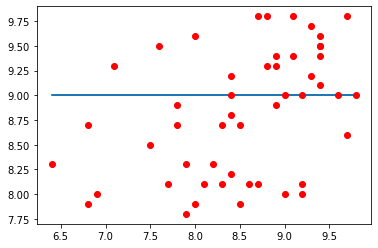

In [1370]:
beta_0 = 6.26
beta_1 = 0.3

#logistic function
Y_pred = sigmoid(x_data, beta_0 , beta_1)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*9)
plt.plot(x_data, y_data, 'ro')

In [1371]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_0 = %f, beta_1 = %f" % (popt[0], popt[1]))

 beta_0 = 3.064941, beta_1 = 0.145902


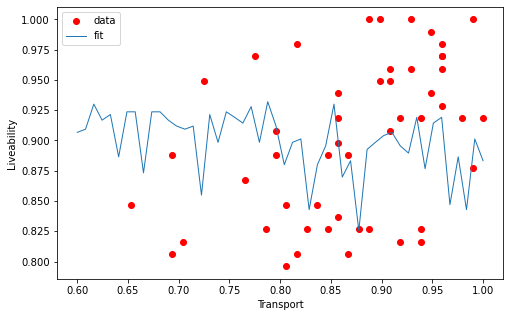

In [1372]:
x = np.linspace(6, 10, 50)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(xdata, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=1.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Liveability')
plt.xlabel('Transport')
plt.show()

In [1373]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat))

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: -0.21


#### Schools vs. Liveability

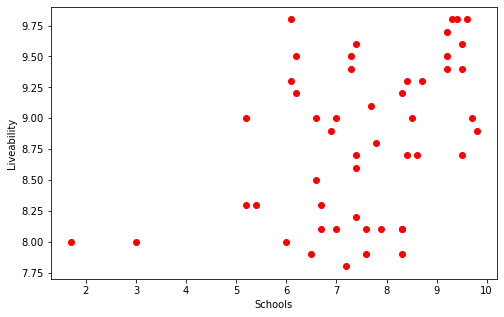

In [1374]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Schools"].values, df["liveability"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Liveability')
plt.xlabel('Schools')
plt.show()

In [1375]:
### Finding the coefficents for beta_0 and beta_1. 
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["Schools"]])
train_y = np.asanyarray(train[['liveability']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.16]]
Intercept:  [7.68]


In [1376]:
def sigmoid(x, Beta_0, Beta_1):
     y = 1 / (1 + np.exp(-Beta_0*(x-Beta_1)))
     return y

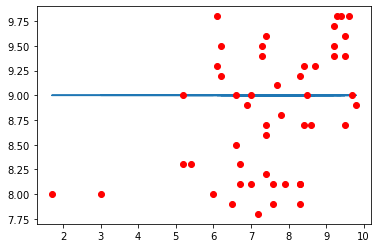

In [1377]:
beta_0 = 7.77
beta_1 = 0.14

#logistic function
Y_pred = sigmoid(x_data, beta_0 , beta_1)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*9)
plt.plot(x_data, y_data, 'ro')

In [1378]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_0 = %f, beta_1 = %f" % (popt[0], popt[1]))

 beta_0 = 1.444335, beta_1 = -0.768531


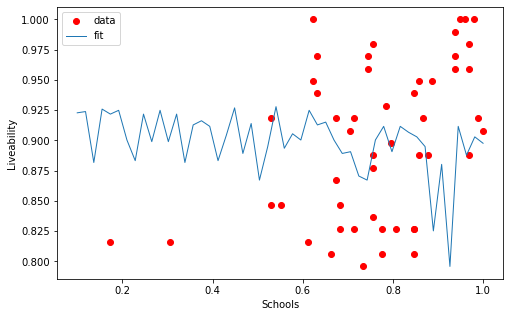

In [1379]:
x = np.linspace(1, 10, 50)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(xdata, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=1.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Liveability')
plt.xlabel('Schools')
plt.show()

In [1380]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat))

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.20


#### Shopping vs. Liveability

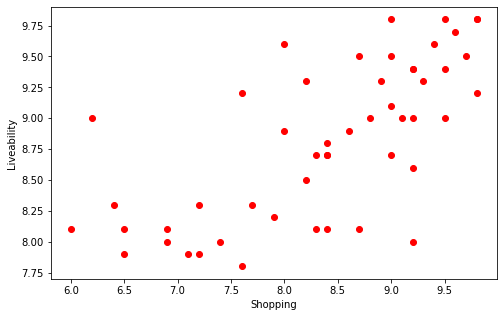

In [1381]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Shopping"].values, df["liveability"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Liveability')
plt.xlabel('Shopping')
plt.show()

In [1382]:
### Finding the coefficents for beta_0 and beta_1. 
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["Shopping"]])
train_y = np.asanyarray(train[['liveability']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.4]]
Intercept:  [5.54]


In [1383]:
def sigmoid(x, Beta_0, Beta_1):
     y = 1 / (1 + np.exp(-Beta_0*(x-Beta_1)))
     return y

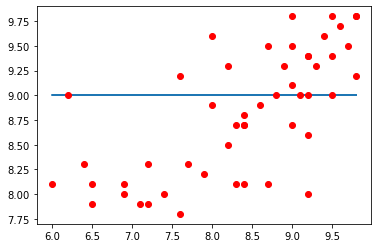

In [1384]:
beta_0 = 5.27
beta_1 = 0.42

#logistic function
Y_pred = sigmoid(x_data, beta_0 , beta_1)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*9)
plt.plot(x_data, y_data, 'ro')

In [1385]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_0 = %f, beta_1 = %f" % (popt[0], popt[1]))

 beta_0 = 3.703605, beta_1 = 0.247693


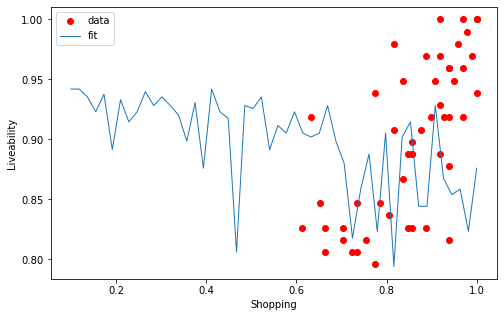

In [1386]:
x = np.linspace(1, 10, 50)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(xdata, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=1.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Liveability')
plt.xlabel('Shopping')
plt.show()

In [1387]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat))

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.21


#### Parking vs. Liveability

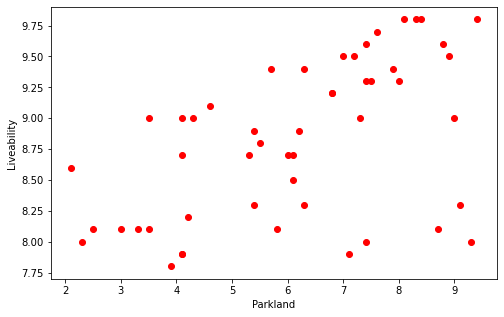

In [1388]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Parkland"].values, df["liveability"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Liveability')
plt.xlabel('Parkland')
plt.show()

In [1389]:
### Finding the coefficents for beta_0 and beta_1. 
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["Parkland"]])
train_y = np.asanyarray(train[['liveability']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.16]]
Intercept:  [7.85]


In [1390]:
def sigmoid(x, Beta_0, Beta_1):
     y = 1 / (1 + np.exp(-Beta_0*(x-Beta_1)))
     return y

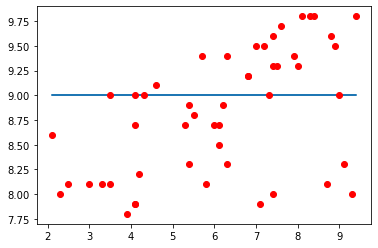

In [1391]:
beta_0 = 8.16
beta_1 = 0.11

#logistic function
Y_pred = sigmoid(x_data, beta_0 , beta_1)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*9)
plt.plot(x_data, y_data, 'ro')

In [1392]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_0 = %f, beta_1 = %f" % (popt[0], popt[1]))

 beta_0 = 1.709712, beta_1 = -0.661948


In [1393]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_0 = %f, beta_1 = %f" % (popt[0], popt[1]))

 beta_0 = 1.709712, beta_1 = -0.661948


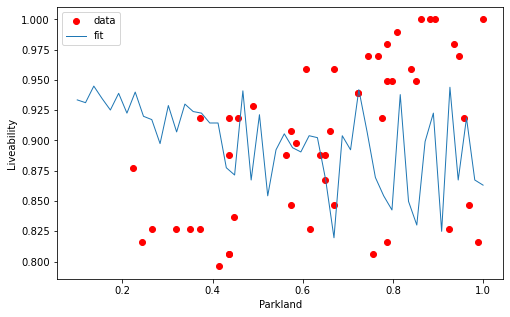

In [1394]:
x = np.linspace(1, 10, 50)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(xdata, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=1.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Liveability')
plt.xlabel('Parkland')
plt.show()

In [1395]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat))

Mean absolute error: 0.06
Residual sum of squares (MSE): 0.00
R2-score: 0.22


So far we conclude that Health variable would fit the model for the Non-Linear Regression.

## 3e. Supervised Learning: Polynomial Regression

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

#### For example y = b + 0.1x + 0.2x^2

PolynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, ENGINESIZE. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [1396]:
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn import linear_model

Suppose we use Health vs. Liveability since we know from 3d. Assuming this would be appriopriate best fit

In [1397]:
train_x = np.asanyarray(train[['Health ']])
train_y = np.asanyarray(train[['liveability']])

test_x = np.asanyarray(test[['Health ']])
test_y = np.asanyarray(test[['liveability']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  9.9 , 98.01],
       [ 1.  ,  9.8 , 96.04],
       [ 1.  ,  9.6 , 92.16],
       [ 1.  ,  9.4 , 88.36],
       [ 1.  ,  9.4 , 88.36],
       [ 1.  ,  9.4 , 88.36],
       [ 1.  ,  9.8 , 96.04],
       [ 1.  ,  8.6 , 73.96],
       [ 1.  ,  9.7 , 94.09],
       [ 1.  ,  8.9 , 79.21],
       [ 1.  ,  8.6 , 73.96],
       [ 1.  ,  8.2 , 67.24],
       [ 1.  ,  9.1 , 82.81],
       [ 1.  ,  9.2 , 84.64],
       [ 1.  ,  8.3 , 68.89],
       [ 1.  ,  9.6 , 92.16],
       [ 1.  ,  8.3 , 68.89],
       [ 1.  ,  9.5 , 90.25],
       [ 1.  ,  9.4 , 88.36],
       [ 1.  ,  8.6 , 73.96],
       [ 1.  ,  7.9 , 62.41],
       [ 1.  ,  8.9 , 79.21],
       [ 1.  ,  9.1 , 82.81],
       [ 1.  ,  9.2 , 84.64],
       [ 1.  ,  7.4 , 54.76],
       [ 1.  ,  8.7 , 75.69],
       [ 1.  ,  9.2 , 84.64],
       [ 1.  ,  9.4 , 88.36],
       [ 1.  ,  8.1 , 65.61],
       [ 1.  ,  9.4 , 88.36],
       [ 1.  ,  8.8 , 77.44],
       [ 1.  ,  8.  , 64.  ],
       [ 1.  ,  8.4 , 70.56],
       [ 1

In [1398]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.   -0.98  0.09]]
Intercept:  [10.59]


Coefficient and Intercept , are the parameters of the fit curvy line. Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:

Text(0, 0.5, 'liveability')

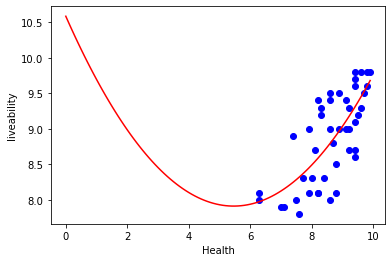

In [1399]:
plt.scatter(train['Health '], train['liveability'],  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Health")
plt.ylabel("liveability")

### Evaluation

In [1400]:
#from sklearn.metrics import r2_score

In [1401]:
test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 0.27
Residual sum of squares (MSE): 0.09
R2-score: 0.36


## 3f. Unsupervised Learning: K-Means Clustering 

Normalizing over the standard deviation.

Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [1402]:
X = df.values[0:,0:]
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.57e+00,  1.07e+00,  1.37e+00,  1.10e+00,  2.13e-01,  1.32e+00,
         1.48e+00, -2.91e-01,  5.41e-01, -7.24e-01, -5.21e-01,  1.13e+00],
       [ 1.57e+00,  9.73e-01,  1.37e+00,  1.16e+00,  3.33e-01,  1.40e+00,
         1.37e+00,  2.74e-01,  8.89e-01, -5.54e-01, -3.56e-01, -7.54e-01],
       [ 1.57e+00,  1.62e+00,  1.08e+00, -8.54e-01,  1.42e+00,  1.07e+00,
         1.15e+00, -8.47e-01, -6.14e-01, -5.12e-01,  2.33e+00,  1.56e+00],
       [ 1.57e+00,  1.12e+00,  6.05e-01,  1.29e+00,  6.96e-01,  1.23e+00,
         9.32e-01, -5.49e-02,  3.71e-02, -2.99e-01, -3.31e-01,  1.86e-01],
       [ 1.41e+00,  7.24e-01,  1.18e+00,  1.04e+00,  9.38e-01,  7.47e-01,
         9.32e-01,  1.63e-01,  2.52e-01, -2.99e-01, -8.51e-01, -4.10e-01],
       [ 1.25e+00,  1.32e+00, -3.53e-01,  1.23e+00, -6.33e-01,  5.03e-01,
         9.32e-01, -1.14e+00, -3.71e-02, -1.15e+00,  1.71e-01,  0.00e+00],
       [ 1.25e+00,  6.25e-01,  9.89e-01, -5.87e-02,  1.06e+00,  9.91e-01,
         1.37e+00, -4.17e-01,  4

### Modeling

In this project (if we didn't have access to the k-means algorithm), it would be the same as guessing that each suburb would have certain liveability, Parkland, Shopping, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

In [1403]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 1 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 0 0 0 2 0 0
 0 0 2 0 0 0 0 0 2 0 0 1 0]


### Insights

We assign the labels to each row in the dataframe.

In [1404]:
df["Clus_km"] = labels
df.head(5)

liveability  Parkland  Shopping  Schools  Transport  Walkability   Health   \
0          9.8       8.3       9.8      9.3        8.7           9.7      9.9   
1          9.8       8.1       9.8      9.4        8.8           9.8      9.8   
2          9.8       9.4       9.5      6.1        9.7           9.4      9.6   
3          9.8       8.4       9.0      9.6        9.1           9.6      9.4   
4          9.7       7.6       9.6      9.2        9.3           9.0      9.4   

   Population_(2021)  Density_(per km2)  Area_(km2)  MEDIAN_PRICE_HOUSE  \
0              10431        7450.000000         1.4           1500000.0   
1              16055        8919.444444         1.8           1600000.0   
2               4896        2580.000000         1.9           3227500.0   
3              12781        5325.420000         2.4           1615000.0   
4              14953        6230.420000         2.4           1300000.0   

   MEDIAN_PRICE_UNIT  Clus_km  
0           794199.0        0  
1           520000.0        0  
2           856500.0        1  
3           656500.0        0  
4           570000.0        0

We can easily check the centroid values by averaging the features in each cluster.

In [1405]:
df.groupby('Clus_km').mean()

liveability  Parkland  Shopping   Schools  Transport  Walkability   \
Clus_km                                                                       
0           8.846154  5.846154  8.484615  7.638462   8.630769      8.356410   
1           9.066667  7.466667  8.233333  6.633333   9.200000      8.633333   
2           8.587500  7.087500  7.850000  7.125000   7.750000      6.537500   

          Health   Population_(2021)  Density_(per km2)  Area_(km2)  \
Clus_km                                                               
0        8.641026       14207.384615        5571.465713    3.178462   
1        8.400000        4951.333333        2754.286667    1.866667   
2        8.200000       12175.750000        4112.919127    3.210000   

         MEDIAN_PRICE_HOUSE  MEDIAN_PRICE_UNIT  
Clus_km                                         
0              1.539951e+06       5.875188e+05  
1              3.510000e+06       1.051500e+06  
2              2.526625e+06       6.762186e+05

Now, let's look at the distribution of suburbs based on their liveability and health:

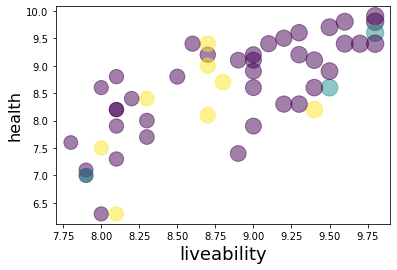

In [1406]:
area = np.pi * ( X[:, 0])**2  
plt.scatter(X[:, 0], X[:, 6], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('liveability', fontsize=18)
plt.ylabel('health', fontsize=16)

plt.show()

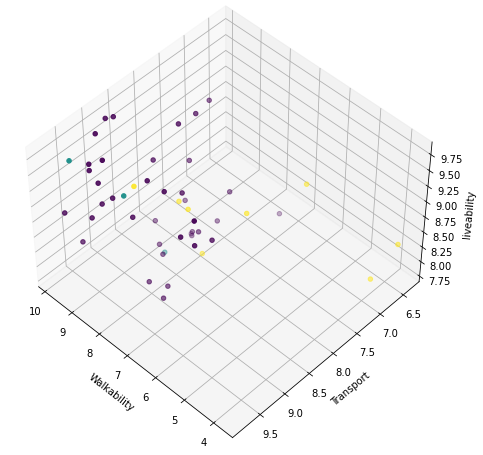

In [1407]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Walkability')
ax.set_ylabel('Transport')
ax.set_zlabel('liveability')

ax.scatter(X[:, 5], X[:, 4], X[:, 0], c= labels.astype(np.float))

k-means will partition the suburbs into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically. Now we can create a profile for each group, considering the common characteristics of each cluster.  For example, the 3 clusters can be:

Walkability and Transport. 

Walkability and liveability.

Transport and liveability.

## 3g. Unsupervised Learning: Hierarchical Clustering Density-Based Clustering

### Redo Section 2. 

In [1593]:
df = pd.read_excel(r'C:\Users\mikel\OneDrive\Desktop\MelT50Subs.xlsx')
mean_value=df['MEDIAN_PRICE_UNIT'].mean()
df['MEDIAN_PRICE_UNIT'].fillna(value=mean_value, inplace=True)
mean_value=df['MEDIAN_PRICE_HOUSE'].mean()
df['MEDIAN_PRICE_HOUSE'].fillna(value=mean_value, inplace=True)
df.head()

SUBURB  liveability  Parkland  Shopping  Schools  Transport  \
0          Fitzory          9.8       8.3       9.8      9.3        8.7   
1          Carlton          9.8       8.1       9.8      9.4        8.8   
2  East Melbourne           9.8       9.4       9.5      6.1        9.7   
3    Fitzory North          9.8       8.4       9.0      9.6        9.1   
4  North Melbourne          9.7       7.6       9.6      9.2        9.3   

   Walkability   Health   Latitude  Longtitude  PostCode  Population_(2021)  \
0           9.7      9.9  -37.7984    144.9785      3065              10431   
1           9.8      9.8  -37.8008    144.9670      3053              16055   
2           9.4      9.6  -37.8103    144.9835      3002               4896   
3           9.6      9.4  -37.7833    144.9838      3068              12781   
4           9.0      9.4  -37.8008    144.9485      3051              14953   

   Density_(per km2)  Area_(km2) CRIME_RATE PROVERTY_RATE Community  \
0        7450.000000         1.4       HIGH          HIGH    Suburb   
1        8919.444444         1.8       HIGH          HIGH     Urban   
2        2580.000000         1.9       HIGH           LOW     Urban   
3        5325.420000         2.4       HIGH          HIGH    Suburb   
4        6230.420000         2.4       HIGH          HIGH     Urban   

   MEDIAN_PRICE_HOUSE  MEDIAN_PRICE_UNIT  
0           1500000.0           794199.0  
1           1600000.0           520000.0  
2           3227500.0           856500.0  
3           1615000.0           656500.0  
4           1300000.0           570000.0

### Feature selection

Let's select our feature set:

In [1594]:
featureset = df[['Parkland','Shopping','Schools','Transport','Walkability ','Health ','Population_(2021)','Density_(per km2)','Area_(km2)','MEDIAN_PRICE_HOUSE','MEDIAN_PRICE_UNIT']]

### Normalisation

Now we can normalize the feature set. MinMaxScaler transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.

In [1595]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.85, 1.  , 0.94, 0.68, 0.98, 1.  , 0.18, 0.21, 0.1 , 0.17, 0.46],
       [0.82, 1.  , 0.95, 0.71, 1.  , 0.97, 0.28, 0.26, 0.14, 0.2 , 0.18],
       [1.  , 0.92, 0.54, 0.97, 0.93, 0.92, 0.07, 0.05, 0.15, 0.75, 0.53],
       [0.86, 0.79, 0.98, 0.79, 0.97, 0.86, 0.22, 0.14, 0.19, 0.2 , 0.32],
       [0.75, 0.95, 0.93, 0.85, 0.87, 0.86, 0.26, 0.17, 0.19, 0.1 , 0.23]])

### Clustering using Scipy

In this part we use Scipy package to cluster the dataset.
First, we calculate the distance matrix.

In [1596]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

array([[0.  , 0.31, 0.82, ..., 1.35, 1.51, 1.53],
       [0.31, 0.  , 0.89, ..., 1.36, 1.55, 1.47],
       [0.82, 0.89, 0.  , ..., 1.5 , 1.37, 1.73],
       ...,
       [1.35, 1.36, 1.5 , ..., 0.  , 1.  , 1.12],
       [1.51, 1.55, 1.37, ..., 1.  , 0.  , 1.27],
       [1.53, 1.47, 1.73, ..., 1.12, 1.27, 0.  ]])

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each: - single - complete - average - weighted - centroid

We use complete for our case, but feel free to change it to see how the results change.

In [1597]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

Essentially, Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering. So you can use a cutting line:

In [1598]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 4, 2, 2, 2, 2, 4, 2, 5, 2, 2, 2, 2, 3, 1, 3, 2, 2, 2, 7, 2,
       2, 2, 3, 3, 3, 2, 1, 3, 3, 2, 3, 3, 6, 3, 3, 3, 3, 7, 3, 3, 3, 7,
       2, 6, 3, 7, 7, 1], dtype=int32)

Also, you can determine the number of clusters directly:

In [1599]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 3, 1, 3, 2, 2, 2, 5, 2,
       2, 2, 3, 3, 3, 2, 1, 3, 3, 2, 3, 3, 5, 3, 3, 3, 3, 5, 3, 3, 3, 5,
       2, 5, 3, 5, 5, 1], dtype=int32)

In [1600]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.   0.31 0.82 ... 1.35 1.51 1.53]
 [0.31 0.   0.89 ... 1.36 1.55 1.47]
 [0.82 0.89 0.   ... 1.5  1.37 1.73]
 ...
 [1.35 1.36 1.5  ... 0.   1.   1.12]
 [1.51 1.55 1.37 ... 1.   0.   1.27]
 [1.53 1.47 1.73 ... 1.12 1.27 0.  ]]


Now, plot the dendrogram:

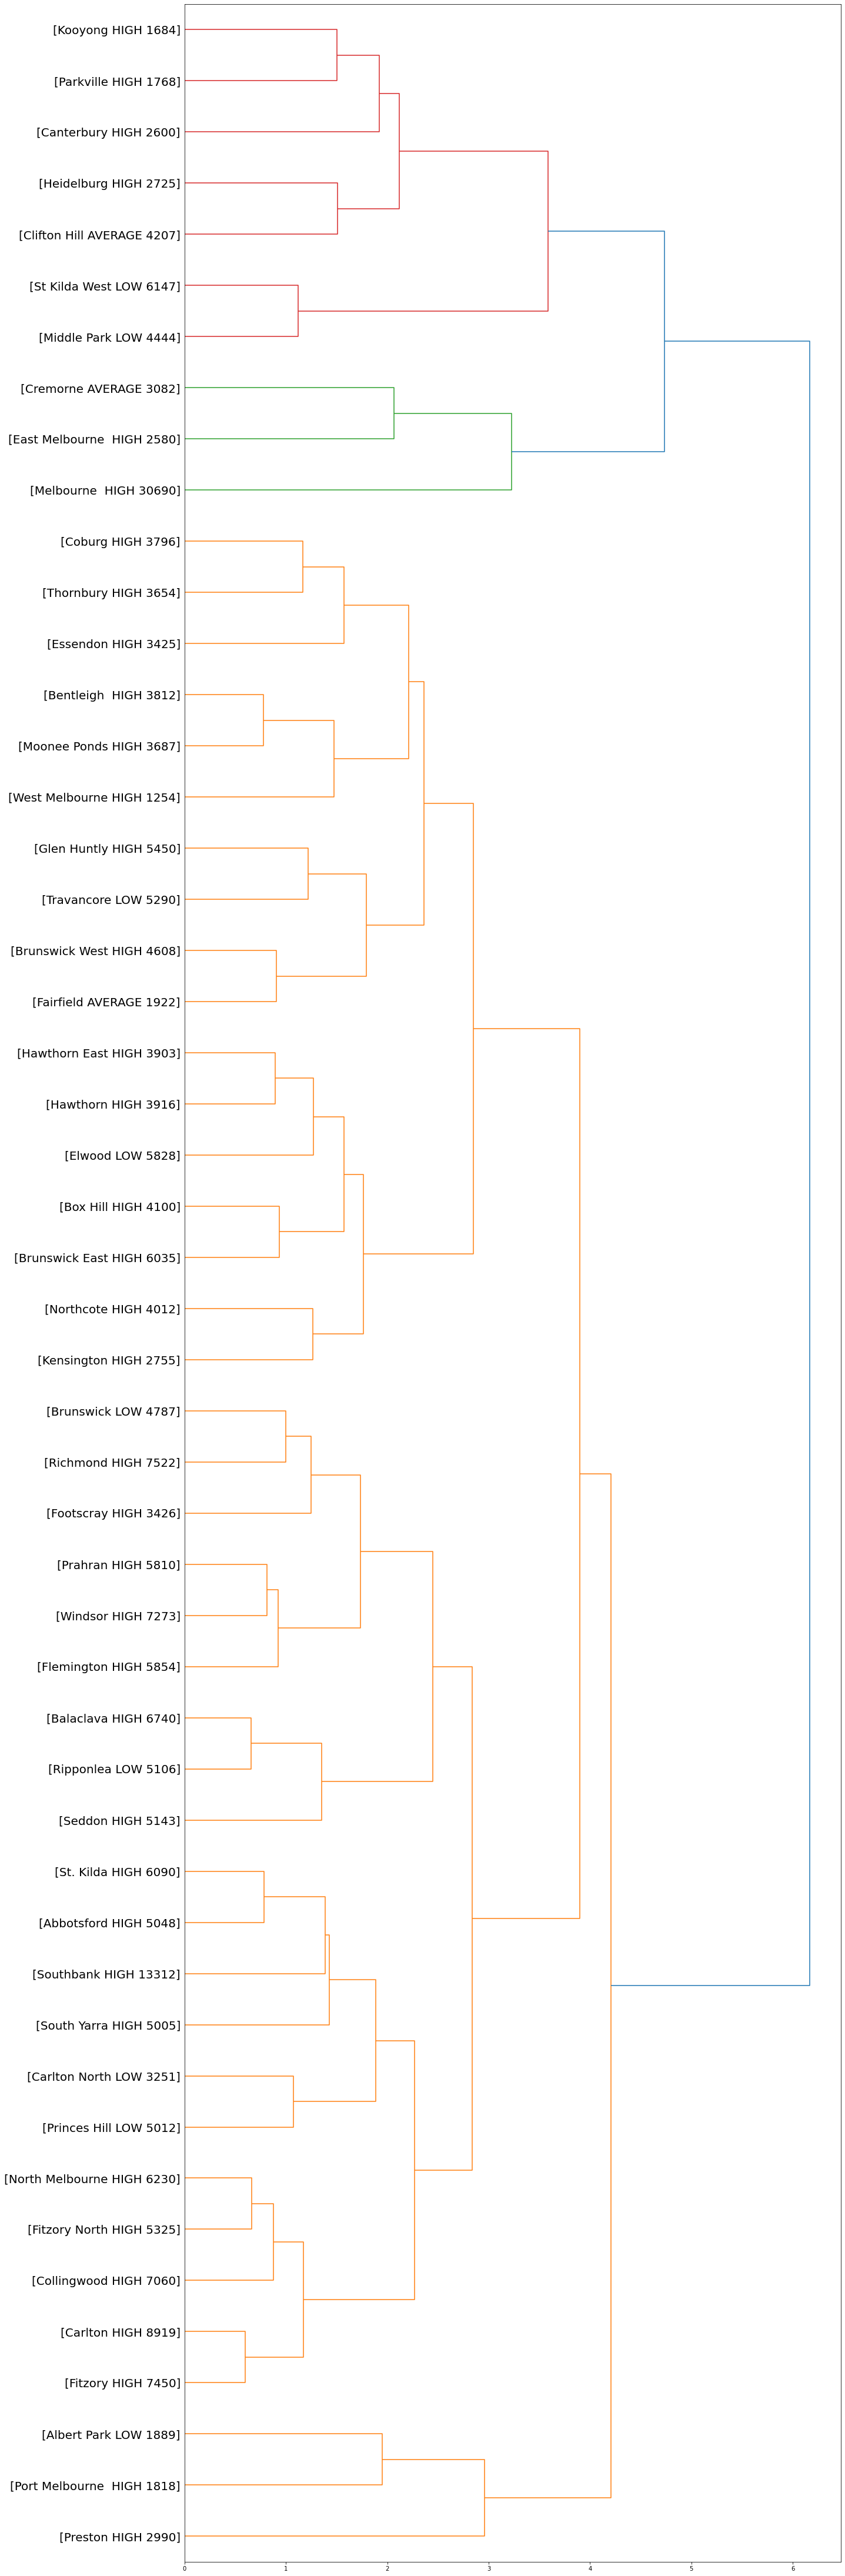

In [1601]:
fig = pylab.figure(figsize=(20,80))
def llf(id):
    return '[%s %s %s]' % (df['SUBURB'][id], df['CRIME_RATE'][id], int(float(df['Density_(per km2)'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size = 20, orientation = 'right')


Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [1602]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

array([4, 4, 0, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 3, 1, 3, 4, 4, 4, 2, 4,
       4, 4, 3, 3, 3, 4, 1, 3, 3, 4, 3, 3, 5, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       4, 5, 3, 2, 2, 1], dtype=int64)

We can add a new field to our dataframe to show the cluster of each row:

In [1603]:
df['cluster_'] = agglom.labels_
df.head()

SUBURB  liveability  Parkland  Shopping  Schools  Transport  \
0          Fitzory          9.8       8.3       9.8      9.3        8.7   
1          Carlton          9.8       8.1       9.8      9.4        8.8   
2  East Melbourne           9.8       9.4       9.5      6.1        9.7   
3    Fitzory North          9.8       8.4       9.0      9.6        9.1   
4  North Melbourne          9.7       7.6       9.6      9.2        9.3   

   Walkability   Health   Latitude  Longtitude  PostCode  Population_(2021)  \
0           9.7      9.9  -37.7984    144.9785      3065              10431   
1           9.8      9.8  -37.8008    144.9670      3053              16055   
2           9.4      9.6  -37.8103    144.9835      3002               4896   
3           9.6      9.4  -37.7833    144.9838      3068              12781   
4           9.0      9.4  -37.8008    144.9485      3051              14953   

   Density_(per km2)  Area_(km2) CRIME_RATE PROVERTY_RATE Community  \
0        7450.000000         1.4       HIGH          HIGH    Suburb   
1        8919.444444         1.8       HIGH          HIGH     Urban   
2        2580.000000         1.9       HIGH           LOW     Urban   
3        5325.420000         2.4       HIGH          HIGH    Suburb   
4        6230.420000         2.4       HIGH          HIGH     Urban   

   MEDIAN_PRICE_HOUSE  MEDIAN_PRICE_UNIT  cluster_  
0           1500000.0           794199.0         4  
1           1600000.0           520000.0         4  
2           3227500.0           856500.0         0  
3           1615000.0           656500.0         4  
4           1300000.0           570000.0         4

In [1604]:
import matplotlib.cm as cm

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Crime Rate')

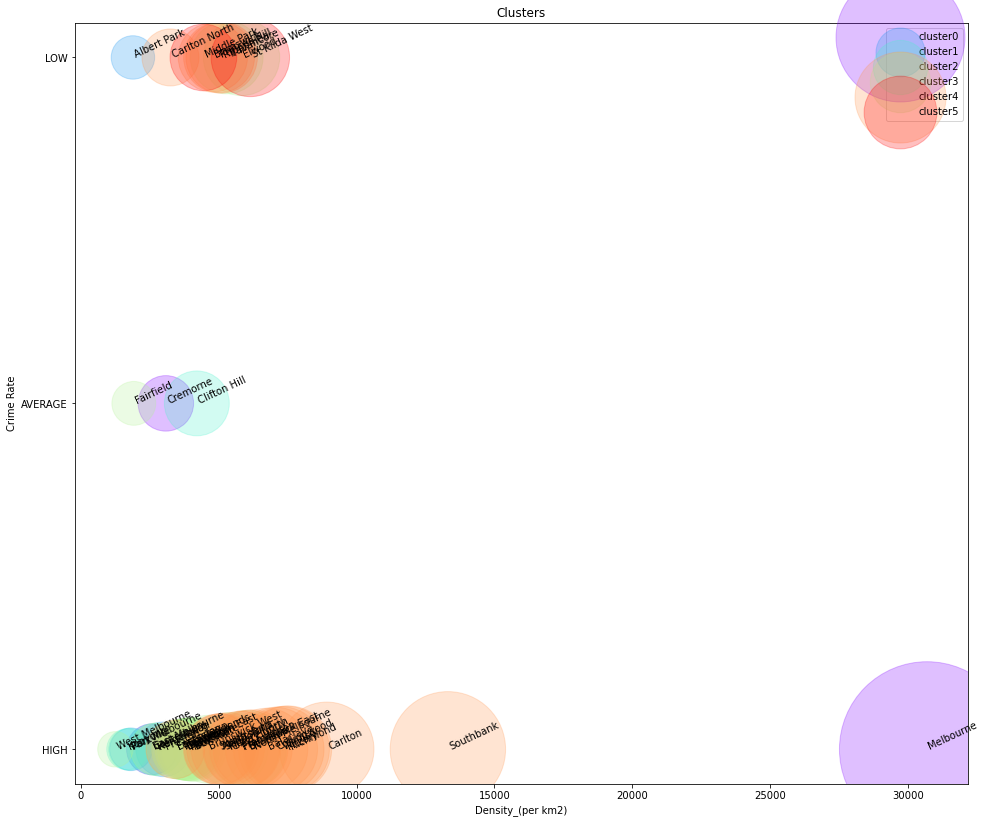

In [1605]:
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset['Density_(per km2)'][i], subset['CRIME_RATE'][i],str(subset['SUBURB'][i]), rotation=25) 
    plt.scatter(subset['Density_(per km2)'], subset['CRIME_RATE'], s= subset['Density_(per km2)'], c=color, label='cluster'+str(label),alpha=0.25)

plt.legend()
plt.title('Clusters')
plt.xlabel('Density_(per km2)')
plt.ylabel('Crime Rate')

As you can see, we are seeing the distribution of each cluster using the scatter plot, but it is not very clear where is the centroid of each cluster. Moreover, there are at least 5 types of clusters each showing how high the density is depending on the crime rate on each suburb for each cluster. The smaller the cluster it gets, the more likely that will likely to be safe on that particular suburb.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Proverty Rate')

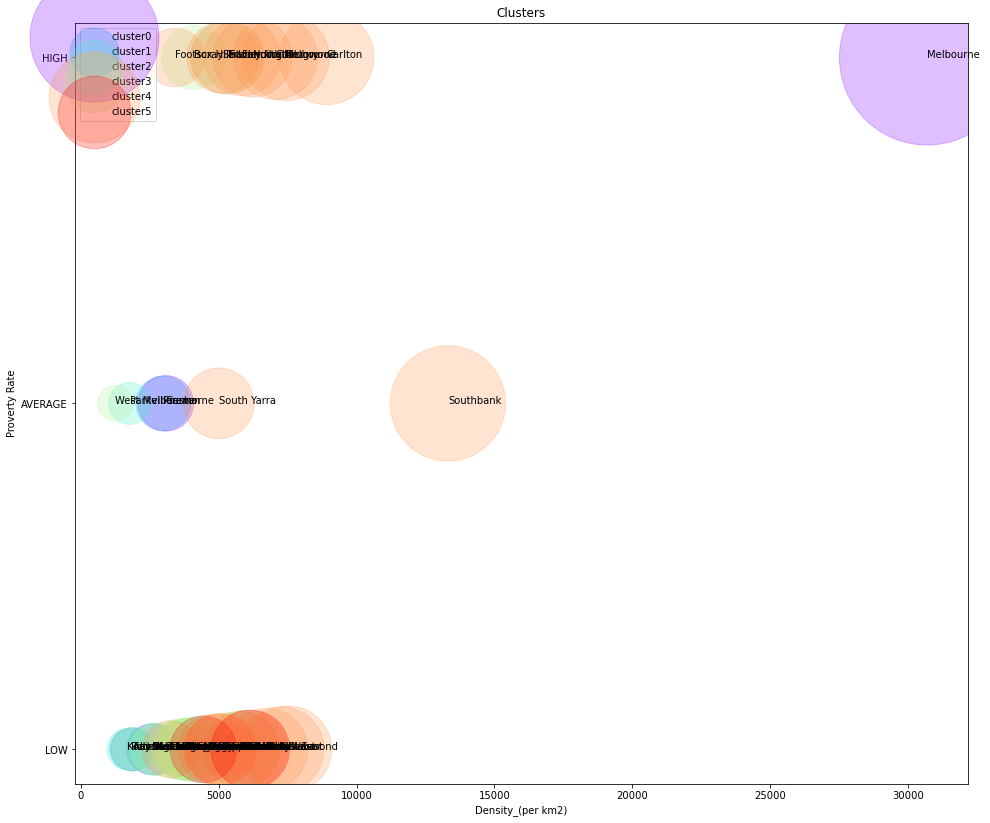

In [1606]:
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset['Density_(per km2)'][i], subset['PROVERTY_RATE'][i],str(subset['SUBURB'][i]), rotation=0) 
    plt.scatter(subset['Density_(per km2)'], subset['PROVERTY_RATE'], s= subset['Density_(per km2)'], c=color, label='cluster'+str(label),alpha=0.25)

plt.legend()
plt.title('Clusters')
plt.xlabel('Density_(per km2)')
plt.ylabel('Proverty Rate')

Similarly for this case except here it depends on the poverty rate for each particular suburb for each cluster.

## 4. Extracting Visualising Data

## 4a. Data Wrangling

In [1427]:
df = pd.read_excel(r'C:\Users\mikel\OneDrive\Desktop\MelT50Subs.xlsx')
mean_value=df['MEDIAN_PRICE_UNIT'].mean()
df['MEDIAN_PRICE_UNIT'].fillna(value=mean_value, inplace=True)
mean_value=df['MEDIAN_PRICE_HOUSE'].mean()
df['MEDIAN_PRICE_HOUSE'].fillna(value=mean_value, inplace=True)
df.head()

SUBURB  liveability  Parkland  Shopping  Schools  Transport  \
0          Fitzory          9.8       8.3       9.8      9.3        8.7   
1          Carlton          9.8       8.1       9.8      9.4        8.8   
2  East Melbourne           9.8       9.4       9.5      6.1        9.7   
3    Fitzory North          9.8       8.4       9.0      9.6        9.1   
4  North Melbourne          9.7       7.6       9.6      9.2        9.3   

   Walkability   Health   Latitude  Longtitude  PostCode  Population_(2021)  \
0           9.7      9.9  -37.7984    144.9785      3065              10431   
1           9.8      9.8  -37.8008    144.9670      3053              16055   
2           9.4      9.6  -37.8103    144.9835      3002               4896   
3           9.6      9.4  -37.7833    144.9838      3068              12781   
4           9.0      9.4  -37.8008    144.9485      3051              14953   

   Density_(per km2)  Area_(km2) CRIME_RATE PROVERTY_RATE Community  \
0        7450.000000         1.4       HIGH          HIGH    Suburb   
1        8919.444444         1.8       HIGH          HIGH     Urban   
2        2580.000000         1.9       HIGH           LOW     Urban   
3        5325.420000         2.4       HIGH          HIGH    Suburb   
4        6230.420000         2.4       HIGH          HIGH     Urban   

   MEDIAN_PRICE_HOUSE  MEDIAN_PRICE_UNIT  
0           1500000.0           794199.0  
1           1600000.0           520000.0  
2           3227500.0           856500.0  
3           1615000.0           656500.0  
4           1300000.0           570000.0

Output the data types

In [1428]:
df.dtypes

SUBURB                 object
liveability           float64
Parkland              float64
Shopping              float64
Schools               float64
Transport             float64
Walkability           float64
Health                float64
Latitude              float64
Longtitude            float64
PostCode                int64
Population_(2021)       int64
Density_(per km2)     float64
Area_(km2)            float64
CRIME_RATE             object
PROVERTY_RATE          object
Community              object
MEDIAN_PRICE_HOUSE    float64
MEDIAN_PRICE_UNIT     float64
dtype: object

In [1429]:
x = df.drop(["Latitude","Longtitude","PostCode","Population_(2021)","Area_(km2)"], axis=1, inplace=True)
x = df.describe()
x

liveability   Parkland   Shopping    Schools  Transport  Walkability   \
count    50.000000  50.000000  50.000000  50.000000  50.000000     50.000000   
mean      8.818000   6.142000   8.368000   7.496000   8.524000      8.082000   
std       0.632033   2.033805   1.054522   1.651216   0.836065      1.241738   
min       7.800000   2.100000   6.000000   1.700000   6.400000      3.800000   
25%       8.125000   4.225000   7.625000   6.625000   8.000000      7.700000   
50%       8.900000   6.250000   8.500000   7.500000   8.650000      8.250000   
75%       9.375000   7.575000   9.200000   8.575000   9.200000      8.900000   
max       9.800000   9.400000   9.800000   9.800000   9.800000      9.800000   

         Health   Density_(per km2)  MEDIAN_PRICE_HOUSE  MEDIAN_PRICE_UNIT  
count  50.000000          50.000000        5.000000e+01       5.000000e+01  
mean    8.556000        5169.067517        1.816022e+06       6.295496e+05  
std     0.914991        4260.394732        6.126530e+05       1.467573e+05  
min     6.300000        1254.000000        1.010000e+06       3.400000e+05  
25%     8.025000        3294.739113        1.399250e+06       5.520000e+05  
50%     8.650000        4526.282500        1.673000e+06       6.025000e+05  
75%     9.350000        5847.646500        1.841505e+06       6.565000e+05  
max     9.900000       30690.000000        3.975000e+06       1.322500e+06

In [1430]:
x.dtypes

liveability           float64
Parkland              float64
Shopping              float64
Schools               float64
Transport             float64
Walkability           float64
Health                float64
Density_(per km2)     float64
MEDIAN_PRICE_HOUSE    float64
MEDIAN_PRICE_UNIT     float64
dtype: object

### Binning

Definition: Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

Example of Binning Data In Pandas.

In [1431]:
df["liveability"]=df["liveability"].astype(int, copy=True)

Let's plot the histogram of horsepower to see what the distribution of livability looks like.

In [1432]:
#%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

Text(0.5, 1.0, 'liveability bins')

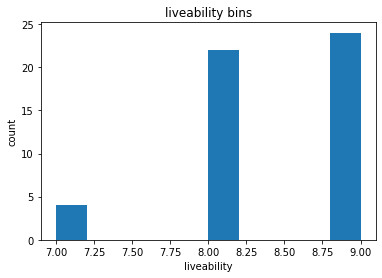

In [1433]:
plt.pyplot.hist(df["liveability"])

# set x/y labels and plot title
plt.pyplot.xlabel("liveability")
plt.pyplot.ylabel("count")
plt.pyplot.title("liveability bins")

We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.

In [1434]:
bins = np.linspace(min(df["liveability"]),max(df["liveability"]), 4)
bins

array([7.  , 7.67, 8.33, 9.  ])

We set group names:

In [1435]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of df["liveability"] belongs to.

In [1436]:
df["liveability-binned"] = pd.cut(df["liveability"], bins, labels=group_names, include_lowest=True )
df[["liveability","liveability-binned"]].head()

liveability liveability-binned
0            9               High
1            9               High
2            9               High
3            9               High
4            9               High

In [1437]:
df["liveability-binned"].value_counts()

High      24
Medium    22
Low        4
Name: liveability-binned, dtype: int64

Let's plot the distribution of each bin:

In [1438]:
#%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

Text(0.5, 1.0, 'liveability bins')

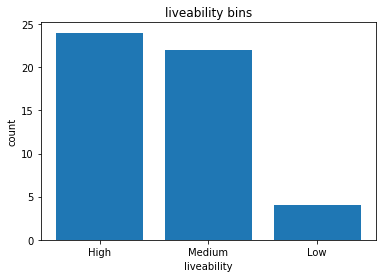

In [1439]:
pyplot.bar(['High', 'Medium', 'Low'], df["liveability-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("liveability")
plt.pyplot.ylabel("count")
plt.pyplot.title("liveability bins")

#### Bins Visualization

Normally, a histogram is used to visualize the distribution of bins we created above.

In [1440]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

Text(0.5, 1.0, 'liveability bins')

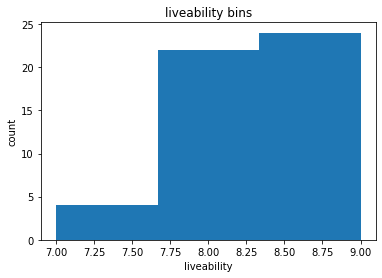

In [1441]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["liveability"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("liveability")
plt.pyplot.ylabel("count")
plt.pyplot.title("liveability bins")

## 4b. Exploratory Data Analysis

Use the function boxplot in the seaborn library to determine whether suburbs with PROVERTY-RATE or liveability have more price outliers.

<AxesSubplot:xlabel='PROVERTY_RATE', ylabel='liveability'>

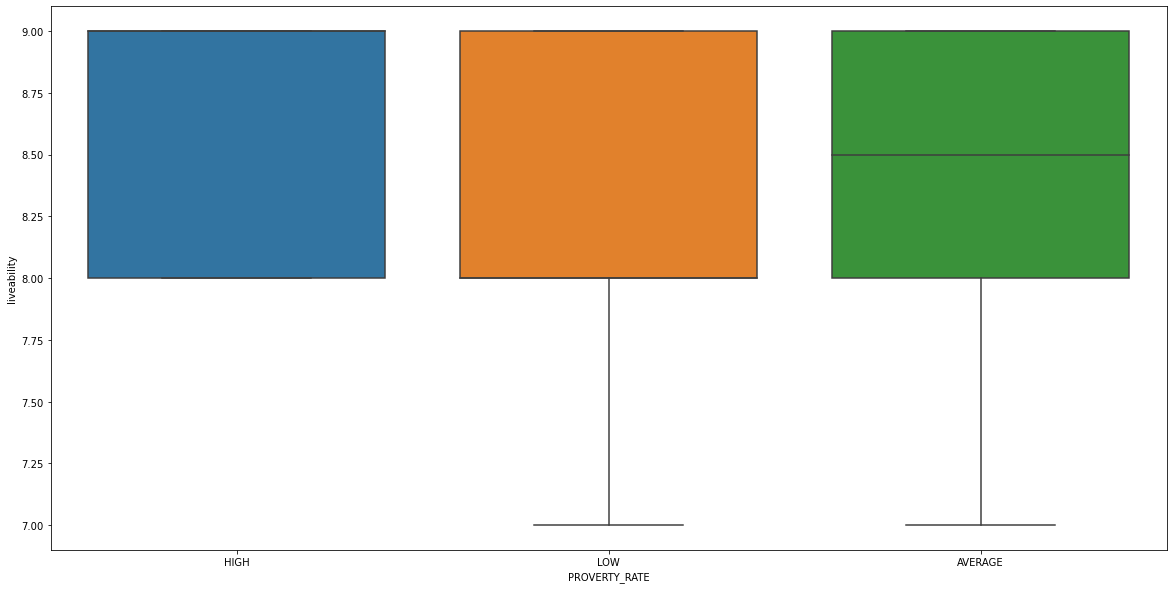

In [1442]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.boxplot(x="PROVERTY_RATE",y="liveability",data=df)

Or determine whether suburbs with Crime-Rate or liveability have more price outliers.

<AxesSubplot:xlabel='CRIME_RATE', ylabel='liveability'>

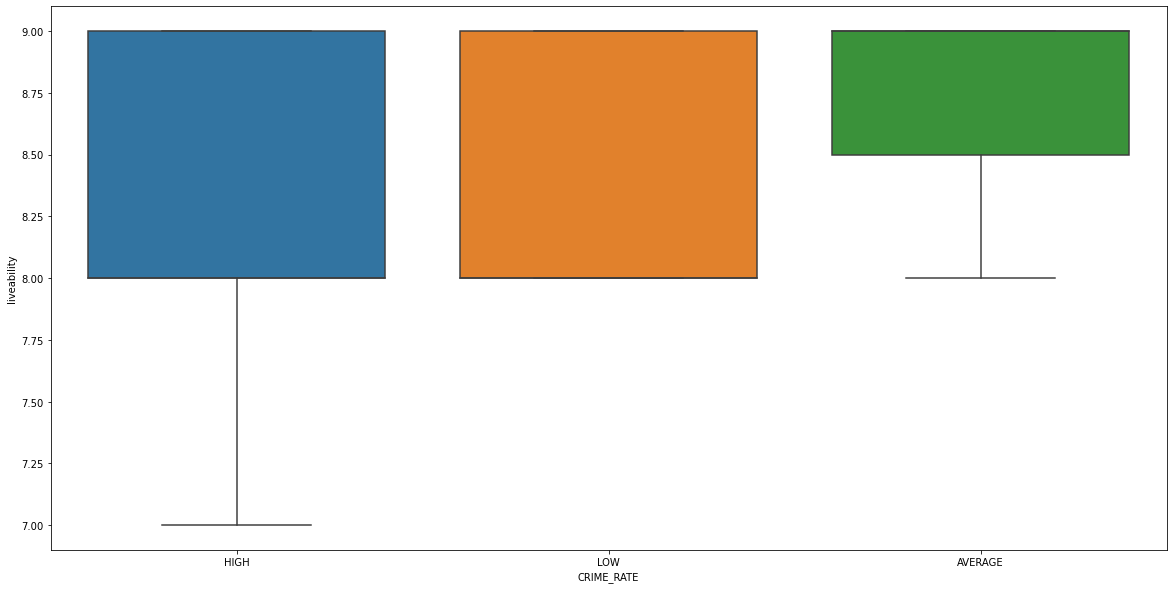

In [1443]:
plt.figure(figsize=(20,10))
sns.boxplot(x="CRIME_RATE",y="liveability",data=df)

Use the function regplot in the seaborn library to determine if the feature Health is negatively or positively correlated with Liveability.

<AxesSubplot:xlabel='Health ', ylabel='liveability'>

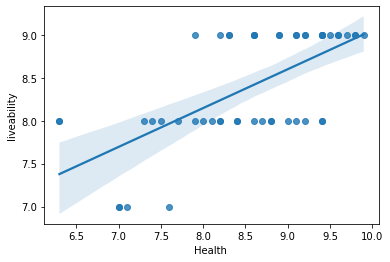

In [1444]:
sns.regplot(x="Health ", y="liveability", data=df)

We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

In [1445]:
df.corr()['liveability'].sort_values()

MEDIAN_PRICE_HOUSE   -0.074503
MEDIAN_PRICE_UNIT     0.044119
Schools               0.233695
Density_(per km2)     0.323044
Walkability           0.377130
Parkland              0.443864
Transport             0.497460
Shopping              0.613115
Health                0.648658
liveability           1.000000
Name: liveability, dtype: float64

## 4c. Model Development

We can fit a linear regression model using the longitude feature 'MEDIAN_PRICE_HOUSE' and calculate the R^2.

In [1446]:
X = df[['MEDIAN_PRICE_HOUSE' ]]
Y = df['liveability']
lm = LinearRegression()
lm.fit(X,Y)
#Calculate R^2 
lm.score(X, Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.005550641166196635


Fit a linear regression model to predict the 'liveability' using the feature 'MEDIAN_PRICE_UNIT' then calculate the R^2.

In [1447]:
X = df[['MEDIAN_PRICE_UNIT' ]]
Y = df['liveability']
lm = LinearRegression()
lm.fit(X,Y)
#Calculate R^2
lm.score(X, Y)

print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.0019464450079615947


Fit a linear regression model to predict the 'liveability' using the list of features:

In [1448]:
features = ['Parkland','Shopping','Schools','Transport','Walkability ','Health ','Density_(per km2)','MEDIAN_PRICE_HOUSE','MEDIAN_PRICE_UNIT']

Then calculate the R^2

In [1449]:
#Fitting the model
Z = df[features]
lm.fit(Z, df['liveability'])

#Computing R^2 
lm.score(Z,df['liveability'])

print('The R-square is: ', lm.score(Z,df['liveability']))

The R-square is:  0.7973601345673683


Create a list of tuples, the first element in the tuple contains the name of the estimator:

'scale'

'polynomial'

'model'

The second element in the tuple contains the model constructor

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()

In [1450]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

In [1451]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [1452]:
Z = Z.astype(float)
pipe.fit(Z,df['liveability'])

# Find the R^2
print('The R-square is: ', pipe.score(Z, df['liveability']))

The R-square is:  1.0


### Multiple Linear Regression

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First, let's make a prediction:

In [1453]:
Y_hat = lm.predict(Z)

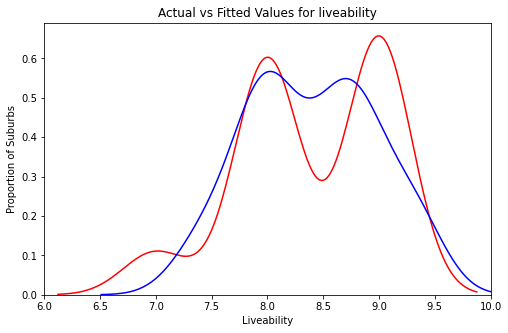

In [1454]:
plt.figure(figsize=(8, 5))


ax1 = sns.distplot(df['liveability'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for liveability')
plt.xlabel('Liveability')
plt.xlim(6, 10.0)
plt.ylabel('Proportion of Suburbs')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

## 4d. Model Evaluation and Refinement

#### Training and Testing

We will split the data into training and testing sets:

In [1455]:
features = ['Parkland','Shopping','Schools','Transport','Walkability ','Health ','Density_(per km2)','MEDIAN_PRICE_HOUSE','MEDIAN_PRICE_UNIT']
X = df[features]
Y = df['liveability']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 8
number of training samples: 42


In [1456]:
#from sklearn.linear_model import LinearRegression

We create a Linear Regression object:

In [1457]:
lre=LinearRegression()

We fit the model using the feature "health":

In [1458]:
lre.fit(x_train[['Health ']], y_train)

LinearRegression()

Let's calculate the R^2 on the test data:

In [1459]:
lre.score(x_test[['Health ']], y_test)

0.42412203853704544

We can see the R^2 is smaller using the test data compared to the training data.

In [1460]:
lre.score(x_train[['Health ']], y_train)

0.38560565971863914

Let's import model_selection from the module cross_val_score.

In [1461]:
#from sklearn.model_selection import cross_val_score

We input the object, the feature ("Health"), and the target data (Y). The parameter 'cv' determines the number of folds. In this case, it is 3.

In [1462]:
Rcross = cross_val_score(lre, X[['Health ']], Y, cv=3)

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:

In [1463]:
Rcross

array([ 0.  , -0.3 , -2.19])

We can calculate the average and standard deviation of our estimate:

In [1464]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -0.8305912634969536 and the standard deviation is 0.970990889771057


We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.

In [1465]:
-1 * cross_val_score(lre,X[['Health ']], Y,cv=3,scoring='neg_mean_squared_error')

array([0.38, 0.31, 0.6 ])

#### Overfitting, Underfitting and Model 

It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world. One reason for this is overfitting. Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

In [1466]:
features = ['Parkland','Shopping','Schools','Transport','Walkability ','Health ','Density_(per km2)','MEDIAN_PRICE_HOUSE','MEDIAN_PRICE_UNIT']

In [1467]:
lr = LinearRegression()
lr.fit(x_train[features], y_train)

LinearRegression()

Prediction using training data:

In [1468]:
yhat_train = lr.predict(x_train[features])
yhat_train[0:5]

array([7.33, 8.49, 8.09, 8.01, 8.66])

Prediction using test data:

In [1469]:
yhat_test = lr.predict(x_test[features])
yhat_test[0:5]

array([8.65, 8.  , 7.62, 8.02, 9.73])

Let's perform some model evaluation using our training and testing data separately. First, we import the seaborn and matplotlib library for plotting.

In [1470]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's examine the distribution of the predicted values of the training data.

In [1471]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Liveability')
    plt.xlim(6, 10.0)
    plt.ylabel('Proportion of Suburbs')

    plt.show()
    plt.close()

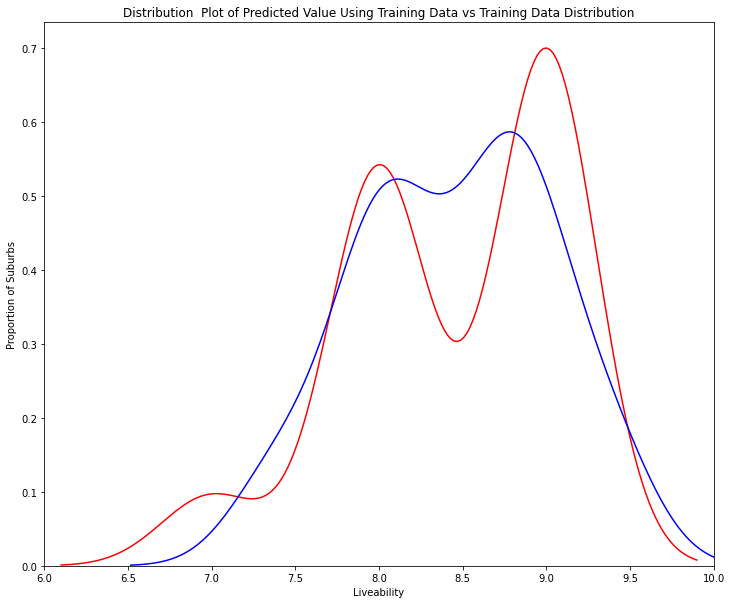

In [1472]:
Title = 'Distribution  Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.

So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

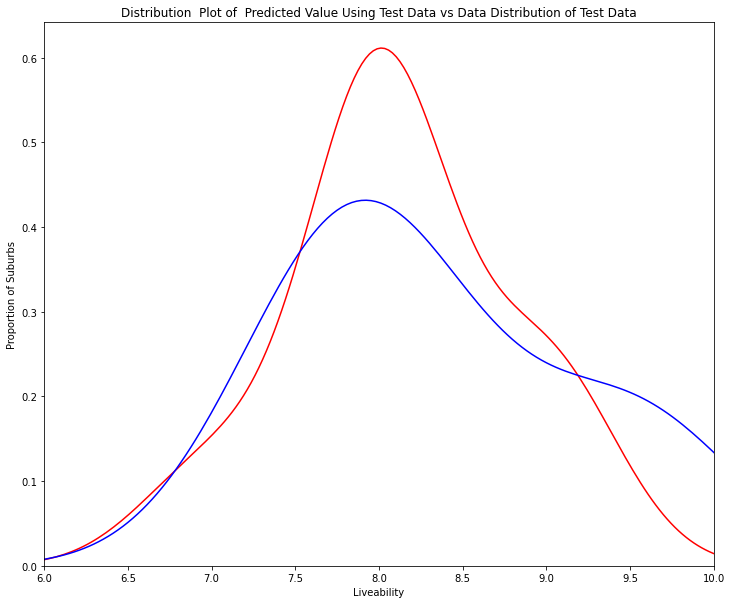

In [1473]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 7.5 to 8.5. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [1474]:
#from sklearn.preprocessing import PolynomialFeatures

#### Overfitting

Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

Let's use 55 percent of the data for training and the rest for testing:

In [1475]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.55, random_state=0)

We will perform a degree 5 polynomial transformation on the feature 'health'.

In [1476]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['Health ']])
x_test_pr = pr.fit_transform(x_test[['Health ']])
pr

PolynomialFeatures(degree=5)

Now, let's create a Linear Regression model "poly" and train it.

In [1477]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".

In [1478]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([8.99, 8.03, 8.44, 7.72, 9.03])

Let's take the first five predicted values and compare it to the actual targets.

In [1479]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [8.99 8.03 8.44 7.72]
True values: [8 9 9 8]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.

In [1480]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([6, 10])
    plt.xlabel('Health')
    plt.ylabel('Liveability')
    plt.legend()

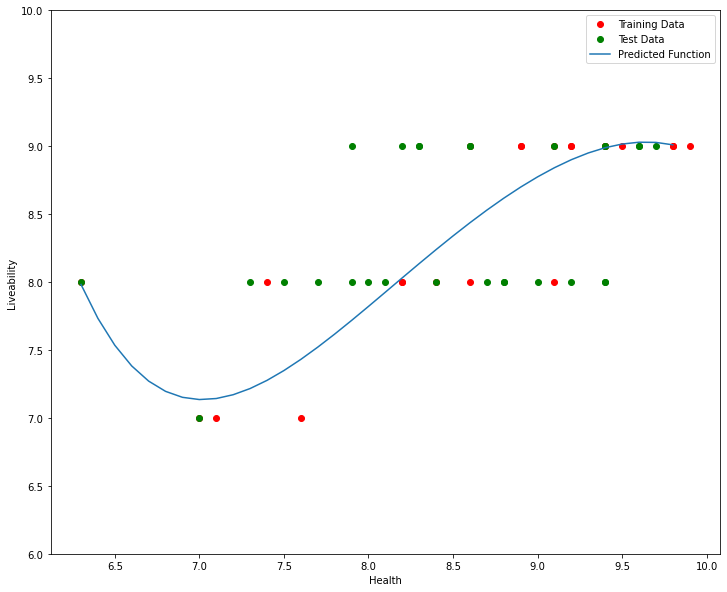

In [1481]:
PollyPlot(x_train[['Health ']], x_test[['Health ']], y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

R^2 of the training data:

In [1482]:
poly.score(x_train_pr, y_train)

0.8011002501132447

R^2 of the test data:

In [1483]:
poly.score(x_test_pr, y_test)

-0.22241650971591276

We see the R^2 for the training data is 0.787369230743599 while the R^2 on the test data was -0.0216307573159491. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

Text(3, 0.75, 'Maximum R^2 ')

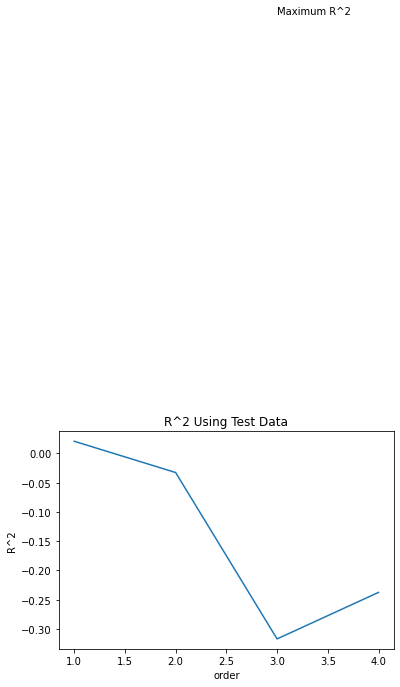

In [1484]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['Health ']])
    
    x_test_pr = pr.fit_transform(x_test[['Health ']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order three polynomial.

The following function will be used in the next section.

In [1485]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['Health ']])
    x_test_pr = pr.fit_transform(x_test[['Health ']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['Health ']], x_test[['Health ']], y_train,y_test, poly, pr)


The following interface allows you to experiment with different polynomial orders and different amounts of data.

In [1486]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

#### Ridge Regression

We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

What if we remove Population and Area in features? See if we change the alpha equal to 2.

In [1487]:
features = ['Parkland','Shopping','Schools','Transport','Walkability ','Health ','Density_(per km2)','MEDIAN_PRICE_HOUSE','MEDIAN_PRICE_UNIT']
X = df[features]
Y = df['liveability']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.55, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 28
number of training samples: 22


In [1488]:
pr=PolynomialFeatures(degree=2)  
x_train_pr=pr.fit_transform(x_train[features])
x_test_pr=pr.fit_transform(x_test[features])  

RigeModel=Ridge(alpha=0.1)

In [1489]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [1490]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:01<00:00, 846.18it/s, Test Score=0.128, Train Score=0.981]


We can plot out the value of R^2 for different alphas:

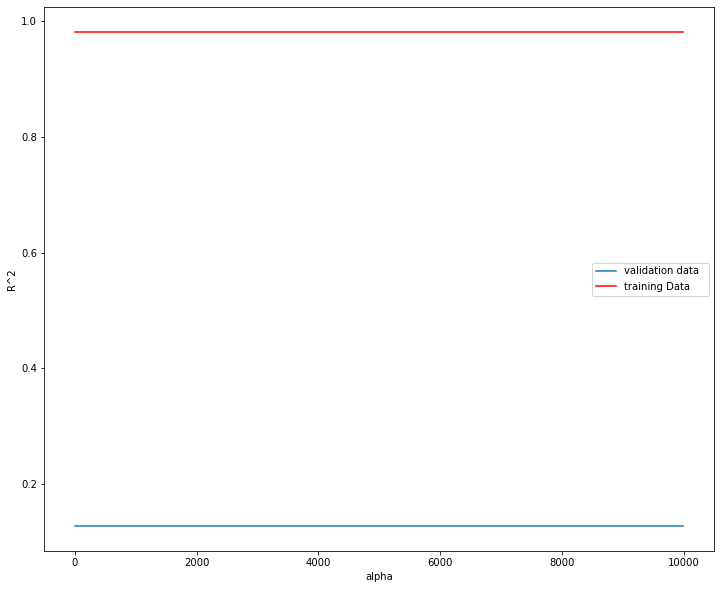

In [1491]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

What if we change the polynomial order to 1 instead?

In [1492]:
pr=PolynomialFeatures(degree=1)  
x_train_pr=pr.fit_transform(x_train[features])
x_test_pr=pr.fit_transform(x_test[features])  

RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [1493]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:01<00:00, 931.46it/s, Test Score=-.0461, Train Score=0.158]


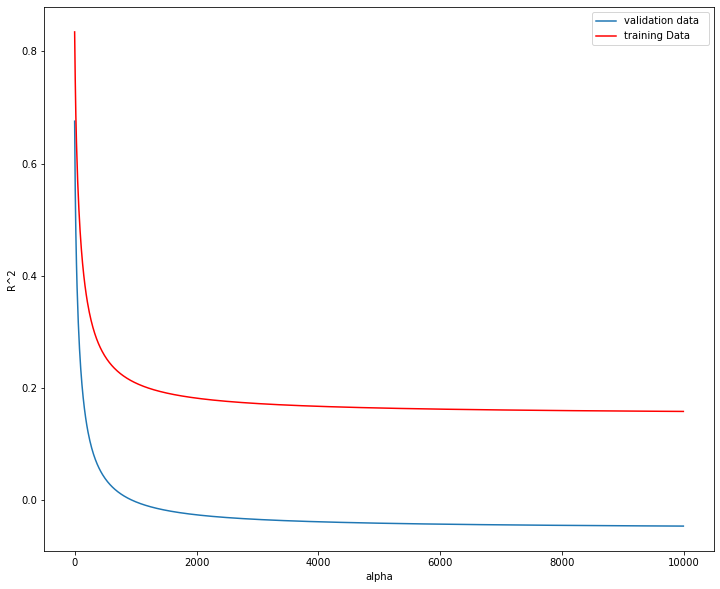

In [1494]:
#We can plot out the value of R^2 for different alphas:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Changing to this order in this case for the training and the validation data would not fit the model properly. 

#### Grid Search

The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

Let's import GridSearchCV from the module model_selection.

In [1495]:
#from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:

In [1496]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a Ridge regression object:

In [1497]:
RR=Ridge()
RR

Ridge()

Create a ridge grid search object:

In [1498]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fit the model:

In [1499]:
Grid1.fit(X[features], Y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [1500]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=0.001)

We now test our model on the test data:

In [1501]:
BestRR.score(X[features], Y)

0.7973601337198324

## 5. Data Visualisation

## 5a. Generating the Map

Reinstall dataframe from section 2.

In [1502]:
df = pd.read_excel(r'C:\Users\mikel\OneDrive\Desktop\MelT50Subs.xlsx')
mean_value=df['MEDIAN_PRICE_UNIT'].mean()
df['MEDIAN_PRICE_UNIT'].fillna(value=mean_value, inplace=True)
mean_value=df['MEDIAN_PRICE_HOUSE'].mean()
df['MEDIAN_PRICE_HOUSE'].fillna(value=mean_value, inplace=True)
df.head()

SUBURB  liveability  Parkland  Shopping  Schools  Transport  \
0          Fitzory          9.8       8.3       9.8      9.3        8.7   
1          Carlton          9.8       8.1       9.8      9.4        8.8   
2  East Melbourne           9.8       9.4       9.5      6.1        9.7   
3    Fitzory North          9.8       8.4       9.0      9.6        9.1   
4  North Melbourne          9.7       7.6       9.6      9.2        9.3   

   Walkability   Health   Latitude  Longtitude  PostCode  Population_(2021)  \
0           9.7      9.9  -37.7984    144.9785      3065              10431   
1           9.8      9.8  -37.8008    144.9670      3053              16055   
2           9.4      9.6  -37.8103    144.9835      3002               4896   
3           9.6      9.4  -37.7833    144.9838      3068              12781   
4           9.0      9.4  -37.8008    144.9485      3051              14953   

   Density_(per km2)  Area_(km2) CRIME_RATE PROVERTY_RATE Community  \
0        7450.000000         1.4       HIGH          HIGH    Suburb   
1        8919.444444         1.8       HIGH          HIGH     Urban   
2        2580.000000         1.9       HIGH           LOW     Urban   
3        5325.420000         2.4       HIGH          HIGH    Suburb   
4        6230.420000         2.4       HIGH          HIGH     Urban   

   MEDIAN_PRICE_HOUSE  MEDIAN_PRICE_UNIT  
0           1500000.0           794199.0  
1           1600000.0           520000.0  
2           3227500.0           856500.0  
3           1615000.0           656500.0  
4           1300000.0           570000.0

Now let's superimpose the locations of the suburbs onto the map. The way to do that in Folium is to create a feature group with its own features and style and then add it to the victoria_map.

Each cluster is then represented by the number of suburbs in each neighborhood. These clusters can be thought of as pockets of Victoria which you can then analyze separately.

To implement this, we start off by instantiating a MarkerCluster object and adding all the data points in the dataframe to this object.

In [1503]:
from folium import plugins

# The map of Victoria, Australia
victoria_map = folium.Map(location=[-37.8, 145], zoom_start=11,tiles='Stamen Terrain')

# instantiate a mark cluster object for the suburbs in the dataframe
suburbs = plugins.MarkerCluster().add_to(victoria_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, labels, in zip(df['Latitude'], df['Longtitude'], df['SUBURB']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=labels,
    ).add_to(suburbs)

# display map
victoria_map

Notice how when you zoom out all the way, all markers are grouped into one cluster, the global cluster, of 50 markers or suburbs, which is the total number of suburbs in our dataframe. Once you start zooming in, the global cluster will start breaking up into smaller clusters. Zooming in all the way will result in individual markers.

### Mark all crime rates that occur on a map

In [1504]:
features = ['Latitude', 'Longtitude', 'CRIME_RATE','SUBURB','PROVERTY_RATE']

In [1505]:
crimes_rates_df = df[features]
crimes_rates_df.head()

Latitude  Longtitude CRIME_RATE           SUBURB PROVERTY_RATE
0  -37.7984    144.9785       HIGH          Fitzory          HIGH
1  -37.8008    144.9670       HIGH          Carlton          HIGH
2  -37.8103    144.9835       HIGH  East Melbourne            LOW
3  -37.7833    144.9838       HIGH    Fitzory North          HIGH
4  -37.8008    144.9485       HIGH  North Melbourne          HIGH

In [1506]:
#Rewrite site map variable to avoid overlapping from the previous 
victoria_map2 = folium.Map(location=[-37.8, 145], zoom_start=11,tiles='Stamen Terrain')
# instantiate a feature group for the launchsites in the dataframe
crimerates = folium.map.FeatureGroup()

# Assign for each Latitude and Longitude for the launchsites 

LAT = df['Latitude']
LONG = df['Longtitude']
LABEL1 = df['CRIME_RATE']
LABEL2 = df['SUBURB']

# loop through the launchsites plus add a circle and label
for lat, lng, label1,label2 in zip(LAT,LONG,LABEL1,LABEL2):
    victoria_map2.add_child(
        folium.Circle(
            [lat, lng],
            radius=500, # define how big you want the circle markers to be
            color='#d35400',
            fill=True
        ).add_child(folium.Popup(label2))
    )
    victoria_map2.add_child(folium.map.Marker(
        [lat,lng],icon=DivIcon(icon_size=(20,20),
                            icon_anchor=(0,0),
                                html='<div style="font-size: 5; color:#d35400;"><b>%s</b></div>'
                                % label1)))
    

victoria_map2.add_child(crimerates)

### Create a new column in crime rate sites data-frame called marker color to store the marker colors based on their crime rate level.

Let's first create a MarkerCluster object.

In [1507]:
marker_cluster = MarkerCluster()

In [1508]:
# Function to assign color to launch outcome
def assign_marker_color(crime_outcome):
    if crime_outcome == "HIGH":
        return 'red'
    if crime_outcome == "AVERAGE":
        return 'blue'
    else:
        return 'green'
    
df['marker_color'] = df['CRIME_RATE'].apply(assign_marker_color)


 For each crime rate result in df, add a folium.Marker to marker_cluster

In [1509]:
# Add marker_cluster to current site_map
victoria_map2.add_child(marker_cluster)

for index, record in df.iterrows():
    # TODO: Create and add a Marker cluster to the site map
    Crime_rate_coordinate = record[['Latitude','Longtitude']].values
    icon_settings=folium.Icon(color='white', icon_color=record['marker_color'])
    
    # marker = folium.Marker(...)
    marker = folium.Marker(Crime_rate_coordinate, icon=icon_settings)
    marker_cluster.add_child(marker)

victoria_map2

### Mark all proverty rates that occur on a map

In [1510]:
#Rewrite site map variable to avoid overlapping from the previous 
victoria_map3 = folium.Map(location=[-37.8, 145], zoom_start=11,tiles='Stamen Terrain')
# instantiate a feature group for the launchsites in the dataframe
provertyrates = folium.map.FeatureGroup()

# Assign for each Latitude and Longitude for the launchsites 

LAT = df['Latitude']
LONG = df['Longtitude']
LABEL1 = df['PROVERTY_RATE']
LABEL2 = df['SUBURB']

# loop through the launchsites plus add a circle and label
for lat, lng, label1,label2 in zip(LAT,LONG,LABEL1,LABEL2):
    victoria_map3.add_child(
        folium.Circle(
            [lat, lng],
            radius=500, # define how big you want the circle markers to be
            color='#d35400',
            fill=True
        ).add_child(folium.Popup(label2))
    )
    victoria_map3.add_child(folium.map.Marker(
        [lat,lng],icon=DivIcon(icon_size=(20,20),
                            icon_anchor=(0,0),
                                html='<div style="font-size: 5; color:#d35400;"><b>%s</b></div>'
                                % label1)))

victoria_map3.add_child(provertyrates)

### Create a new column in proverty rate sites data-frame called marker color to store the marker colors based on their proverty rate level.

Let's first create a MarkerCluster object.

In [1511]:
marker_cluster = MarkerCluster()

In [1512]:
# Function to assign color to launch outcome
def assign_marker_color(crime_outcome):
    if crime_outcome == "HIGH":
        return 'red'
    if crime_outcome == "AVERAGE":
        return 'blue'
    else:
        return 'green'
    
df['marker_color'] = df['PROVERTY_RATE'].apply(assign_marker_color)

For each crime rate result in df, add a folium.Marker to marker_cluster

In [1513]:
# Add marker_cluster to current site_map
victoria_map3.add_child(marker_cluster)

for index, record in df.iterrows():
    # TODO: Create and add a Marker cluster to the site map
    proverty_rate_coordinate = record[['Latitude','Longtitude']].values
    icon_settings=folium.Icon(color='white', icon_color=record['marker_color'])
    
    # marker = folium.Marker(...)
    marker = folium.Marker(proverty_rate_coordinate, icon=icon_settings)
    marker_cluster.add_child(marker)

victoria_map3

## 5b. Plotly Chart 

In [1514]:
df.dtypes

SUBURB                 object
liveability           float64
Parkland              float64
Shopping              float64
Schools               float64
Transport             float64
Walkability           float64
Health                float64
Latitude              float64
Longtitude            float64
PostCode                int64
Population_(2021)       int64
Density_(per km2)     float64
Area_(km2)            float64
CRIME_RATE             object
PROVERTY_RATE          object
Community              object
MEDIAN_PRICE_HOUSE    float64
MEDIAN_PRICE_UNIT     float64
marker_color           object
dtype: object

First, let's try to see how the health-care system and liveability variables would affect residents life expectancy.

We can plot out the Health-care vs. Liveability overlay the outcome of the expectancy. We see that Health increases, the depending on which suburb residents currently live in. Liveability is also important; it seems the more massive the liveability, the less likely the health-care system to be flawed.

## Cat-plots

### Health vs. Liveability

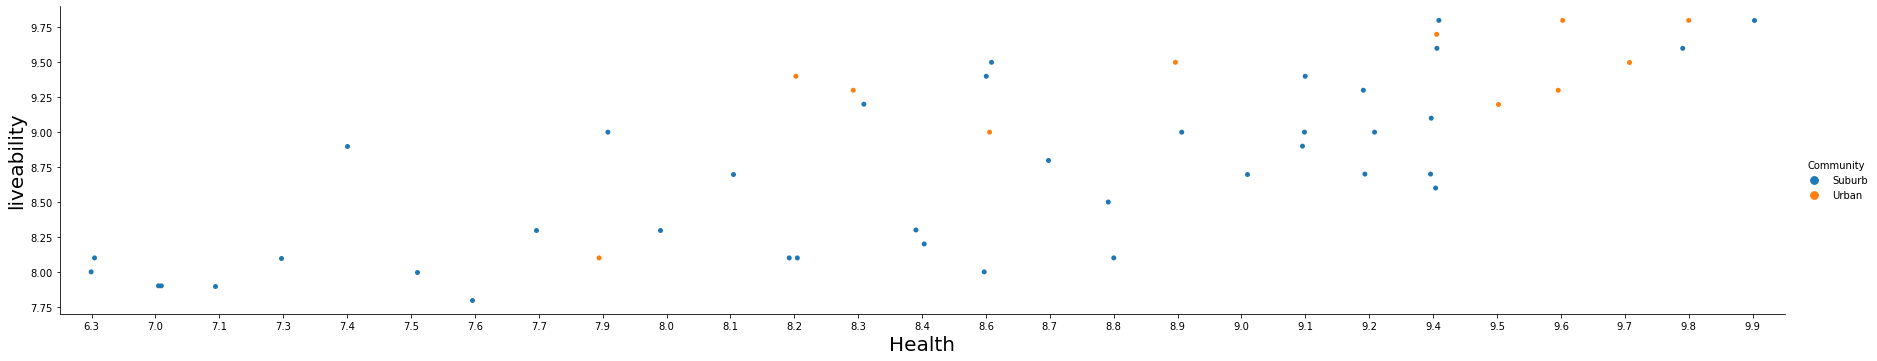

In [1515]:
sns.catplot(y="liveability", x="Health ", hue="Community", data=df, aspect = 5)
plt.xlabel("Health",fontsize=20)
plt.ylabel("liveability",fontsize=20)
plt.show()

### Let's see if we can compare Parkland vs. Transport 

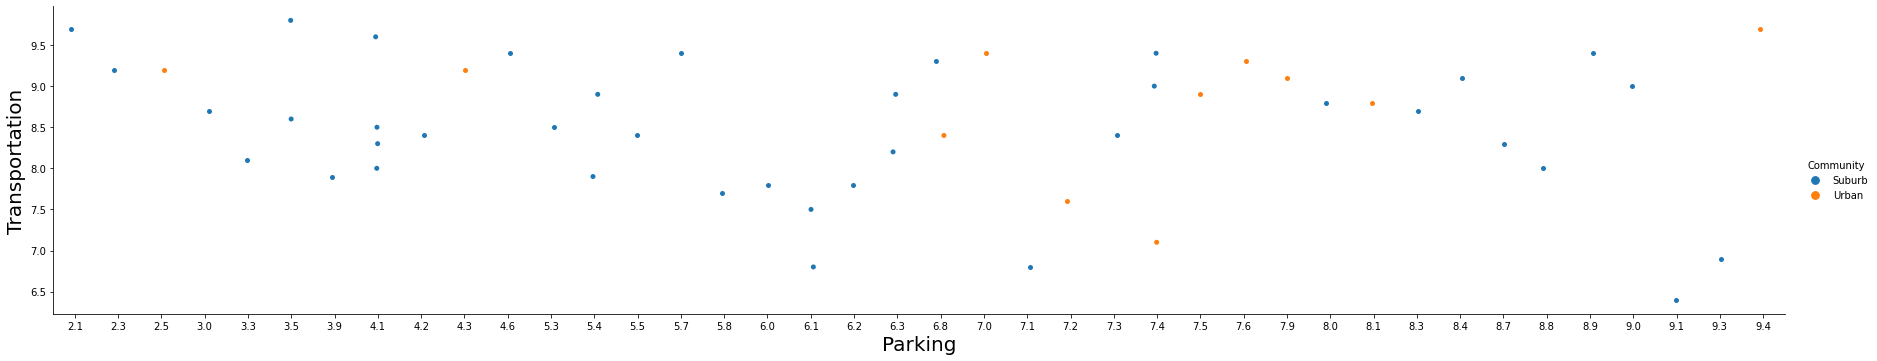

In [1516]:
sns.catplot(y="Transport", x="Parkland", hue="Community", data=df, aspect = 5)
plt.xlabel("Parking",fontsize=20)
plt.ylabel("Transportation",fontsize=20)
plt.show()

### Walkability vs. Transport

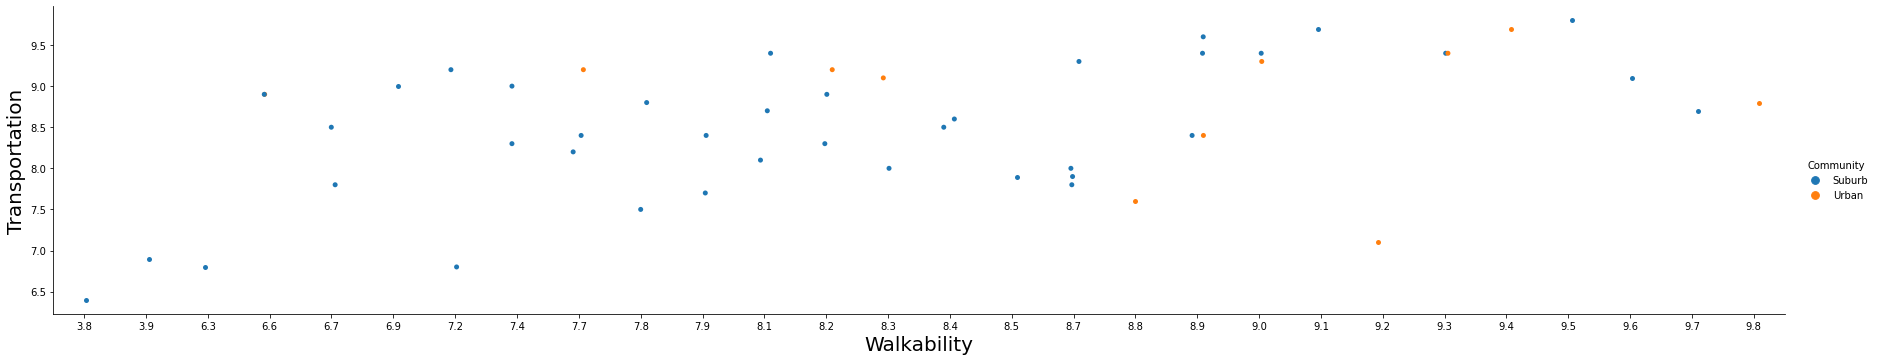

In [1517]:
sns.catplot(y="Transport", x="Walkability ", hue="Community", data=df, aspect = 5)
plt.xlabel("Walkability",fontsize=20)
plt.ylabel("Transportation",fontsize=20)
plt.show()

Comparing Liveability to other features

### Transport vs. Liveability

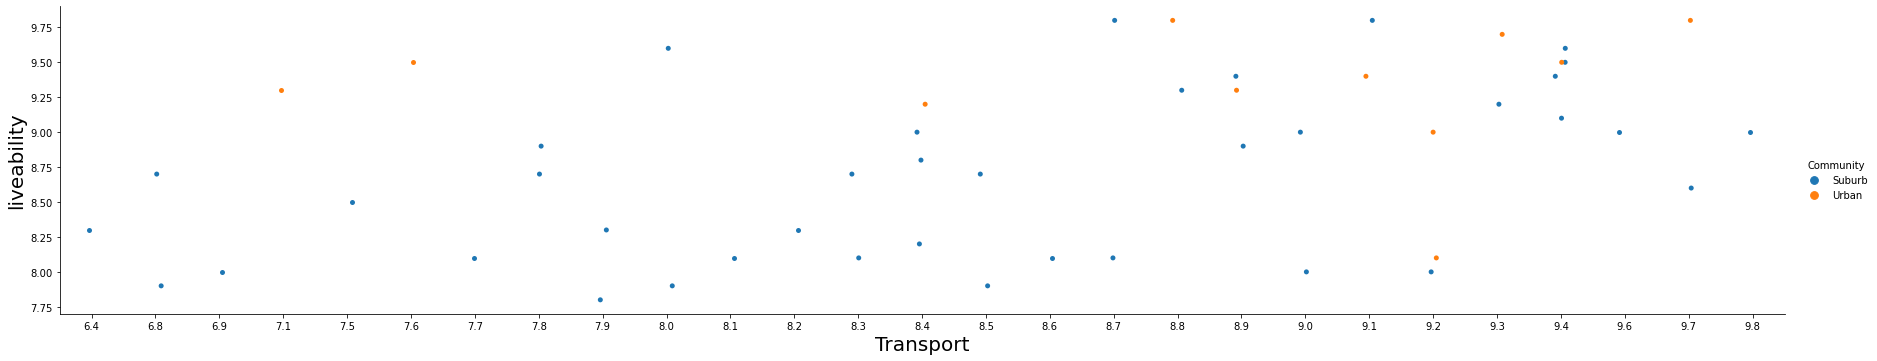

In [1518]:
sns.catplot(y="liveability", x="Transport", hue="Community", data=df, aspect = 5)
plt.xlabel("Transport",fontsize=20)
plt.ylabel("liveability",fontsize=20)
plt.show()

### Parking vs. Liveability

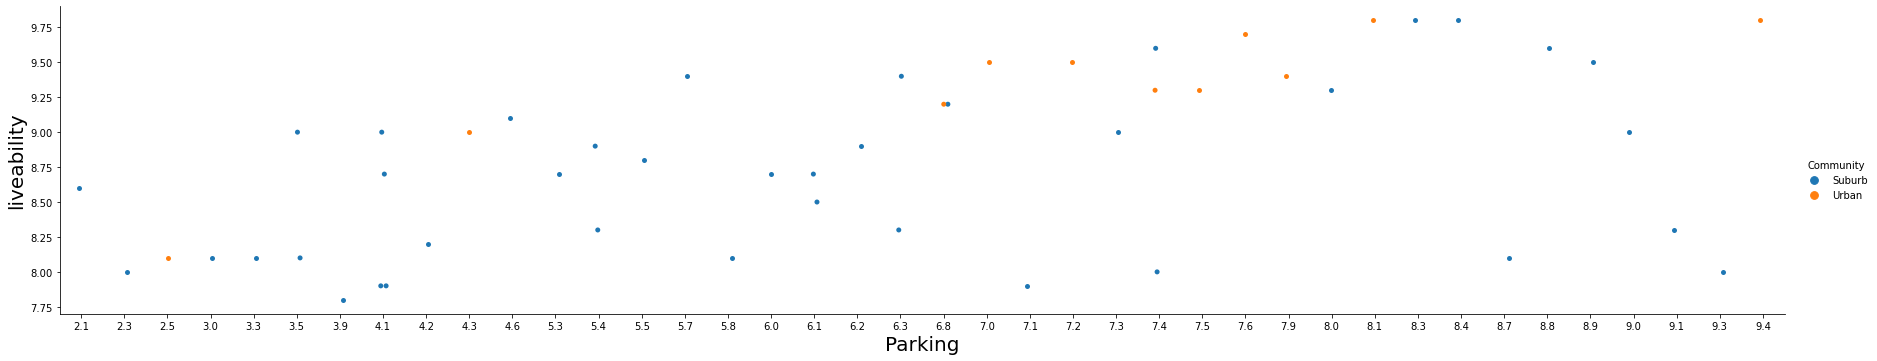

In [1519]:
sns.catplot(y="liveability", x="Parkland", hue="Community", data=df, aspect = 5)
plt.xlabel("Parking",fontsize=20)
plt.ylabel("liveability",fontsize=20)
plt.show()

### Shopping vs. liveability

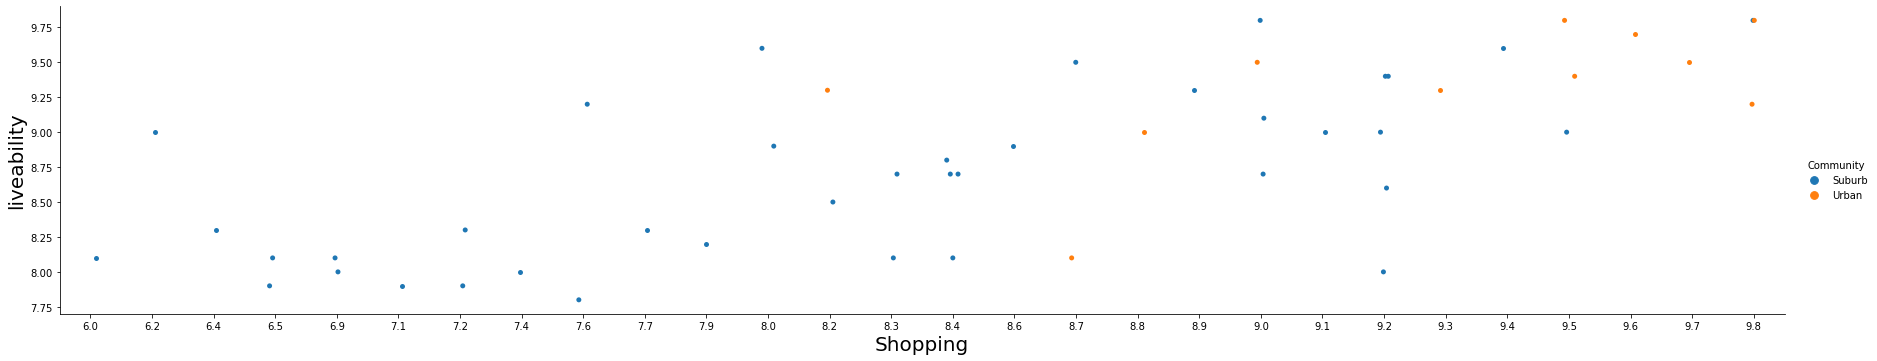

In [1520]:
sns.catplot(y="liveability", x="Shopping", hue="Community", data=df, aspect = 5)
plt.xlabel("Shopping",fontsize=20)
plt.ylabel("liveability",fontsize=20)
plt.show()

### Schools vs. liveability

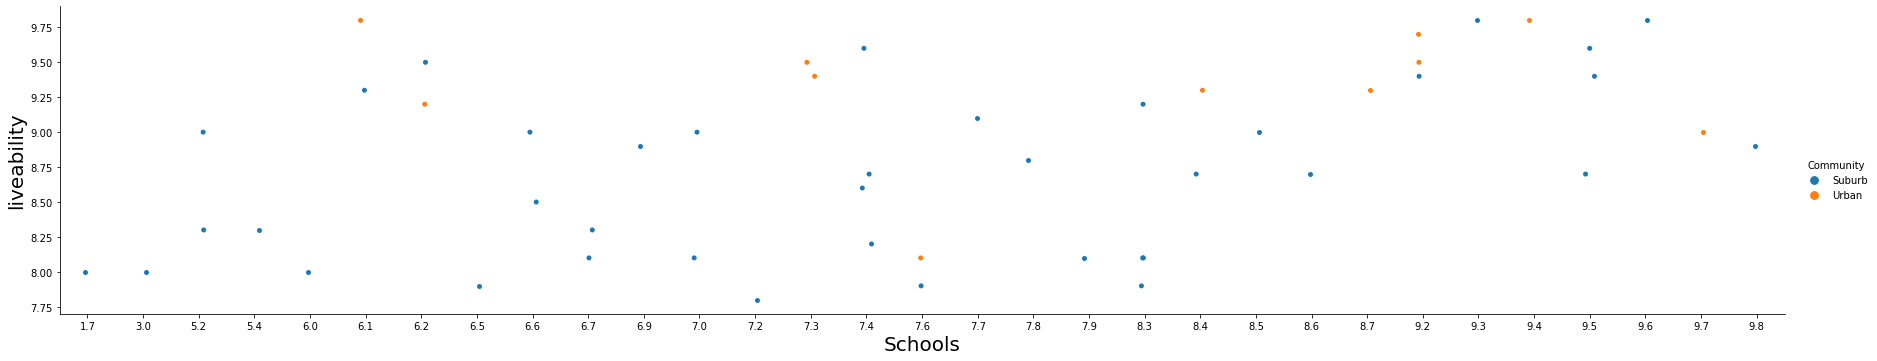

In [1521]:
sns.catplot(y="liveability", x="Schools", hue="Community", data=df, aspect = 5)
plt.xlabel("Schools",fontsize=20)
plt.ylabel("liveability",fontsize=20)
plt.show()

### Walkability vs. Liveability

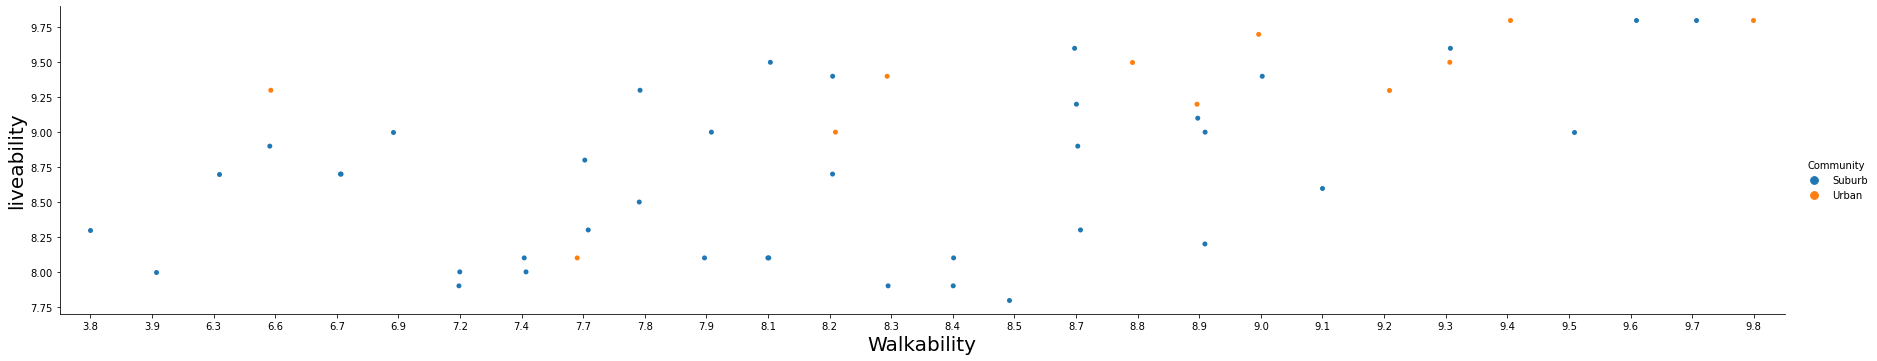

In [1522]:
sns.catplot(y="liveability", x="Walkability ", hue="Community", data=df, aspect = 5)
plt.xlabel("Walkability",fontsize=20)
plt.ylabel("liveability",fontsize=20)
plt.show()

## Bar-plots

### Health vs. Liveability

<AxesSubplot:xlabel='Health ', ylabel='liveability'>

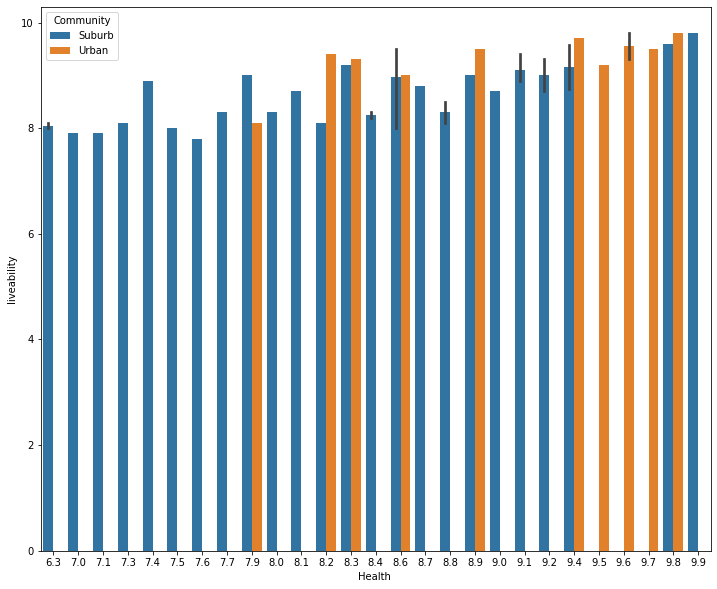

In [1523]:
plt.figure(figsize=(12,10))
sns.barplot(x="Health ",y="liveability",data=df,hue='Community')


### Parking vs. Transportation

<AxesSubplot:xlabel='Parkland', ylabel='Transport'>

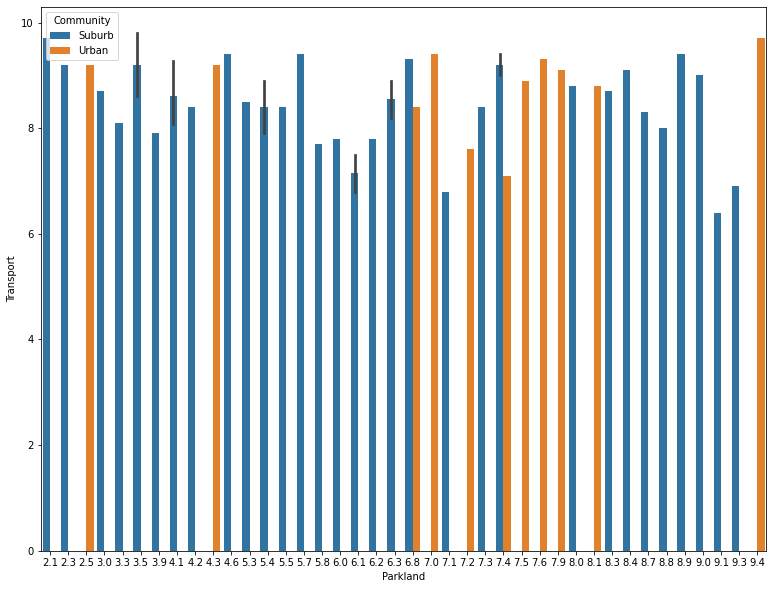

In [1524]:
plt.figure(figsize=(13,10))
sns.barplot(x="Parkland",y="Transport",data=df,hue='Community')

### Walkability vs. Transportation

<AxesSubplot:xlabel='Walkability ', ylabel='Transport'>

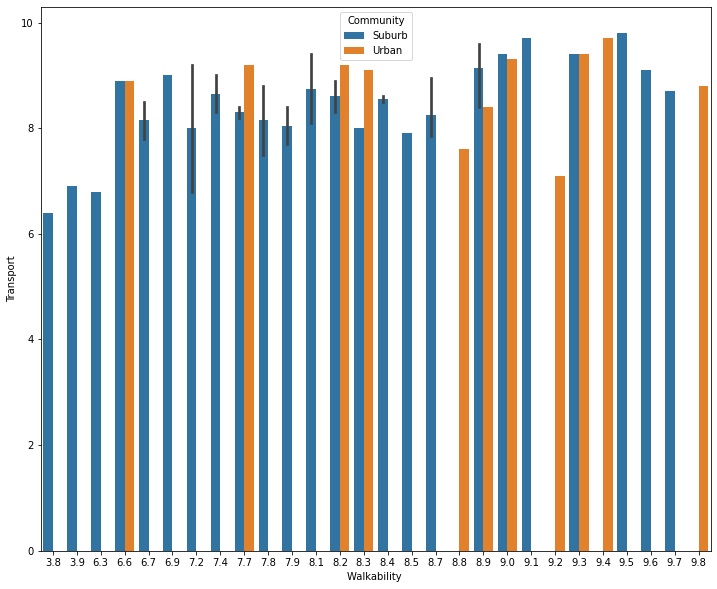

In [1525]:
plt.figure(figsize=(12,10))
sns.barplot(x="Walkability ",y="Transport",data=df,hue='Community')

### Transport vs. Liveability

<AxesSubplot:xlabel='Transport', ylabel='liveability'>

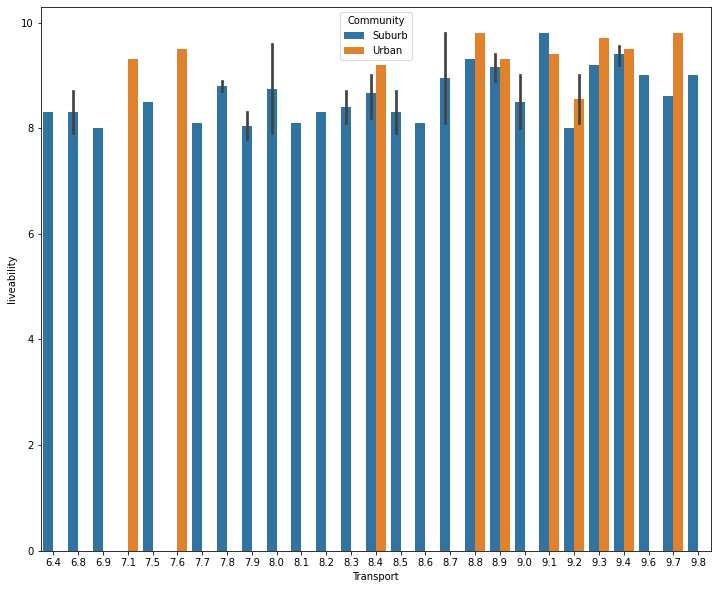

In [1526]:
plt.figure(figsize=(12,10))
sns.barplot(x="Transport",y="liveability",data=df,hue='Community')

### Parking vs. Liveability

<AxesSubplot:xlabel='Parkland', ylabel='liveability'>

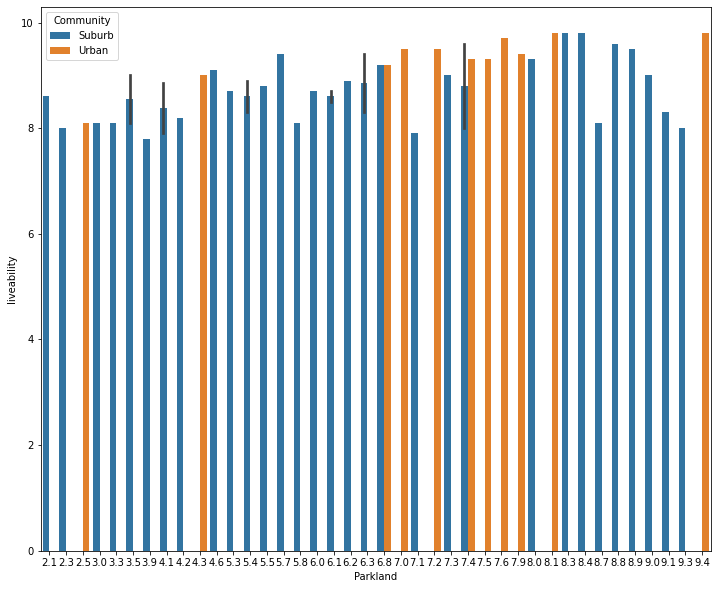

In [1527]:
plt.figure(figsize=(12,10))
sns.barplot(x="Parkland",y="liveability",data=df,hue='Community')

### Shopping vs. Liveability

<AxesSubplot:xlabel='Shopping', ylabel='liveability'>

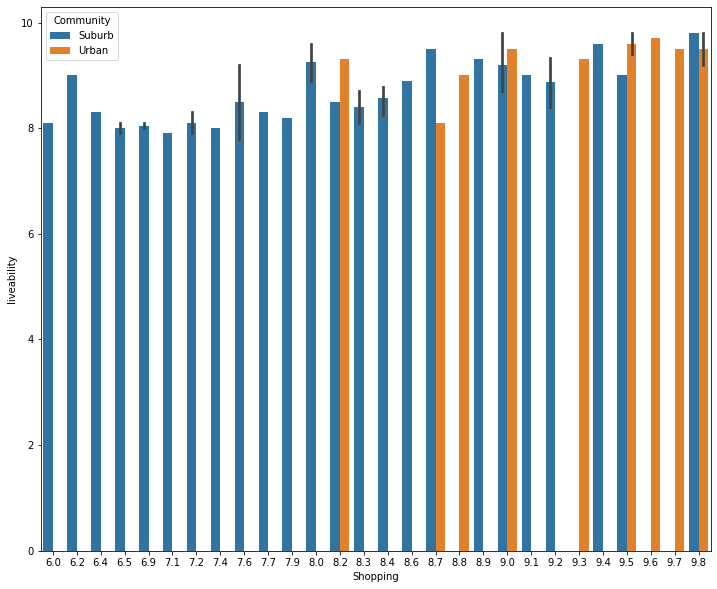

In [1528]:
plt.figure(figsize=(12,10))
sns.barplot(x="Shopping",y="liveability",data=df,hue='Community')

### Schools vs. liveability

<AxesSubplot:xlabel='Schools', ylabel='liveability'>

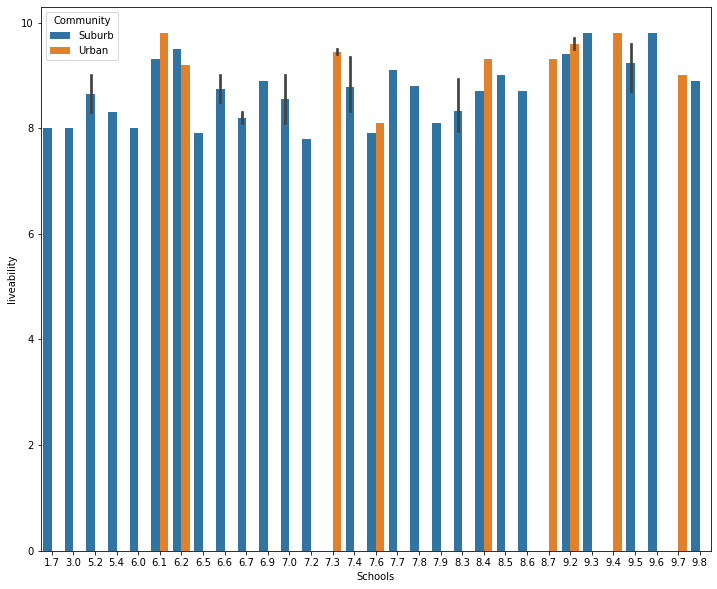

In [1529]:
plt.figure(figsize=(12,10))
sns.barplot(x="Schools",y="liveability",data=df,hue='Community')

### Walkability vs. Liveability

<AxesSubplot:xlabel='Walkability ', ylabel='liveability'>

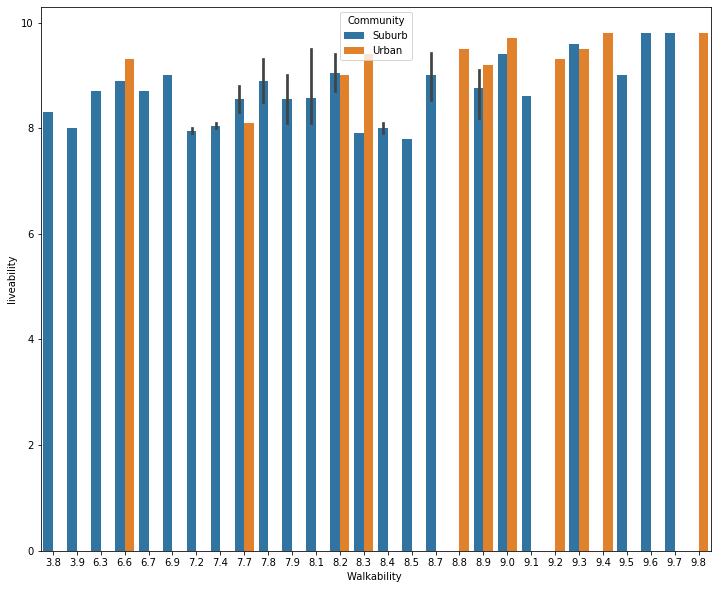

In [1530]:
plt.figure(figsize=(12,10))
sns.barplot(x="Walkability ",y="liveability",data=df,hue='Community')

## Scatter Plots

In [1531]:
!pip install plotly
!pip install cufflinks

In [1532]:
import plotly.express as px
import plotly.graph_objects as go

### Health vs. Liveability

In [1533]:
# First we create a figure using go.Figure and adding trace to it through go.scatter
fig = go.Figure(data=go.Scatter(x=df['Health '], y=df['liveability'], mode='markers', marker=dict(color='red')))
# Updating layout through `update_layout`. Here we are adding title to the plot and providing title to x and y axis.
fig.update_layout(title='Health vs Liveability', xaxis_title='Health', yaxis_title='Liveability')
# Display the figure
fig.show()

### Parking vs. Transportation

In [1534]:
# First we create a figure using go.Figure and adding trace to it through go.scatter
fig = go.Figure(data=go.Scatter(x=df['Parkland'], y=df['Transport'], mode='markers', marker=dict(color='red')))
# Updating layout through `update_layout`. Here we are adding title to the plot and providing title to x and y axis.
fig.update_layout(title='Parking vs. Liveability', xaxis_title='Parking', yaxis_title='Liveability')
# Display the figure
fig.show()

### Walkability vs. Transportation

In [1535]:
fig = go.Figure(data=go.Scatter(x=df['Walkability '], y=df['Transport'], mode='markers', marker=dict(color='red')))
fig.update_layout(title='Walkability vs. Liveability', xaxis_title='Walkability', yaxis_title='Liveability')
fig.show()

### Transport vs. Liveability

In [1536]:
fig = go.Figure(data=go.Scatter(x=df['Transport'], y=df['liveability'], mode='markers', marker=dict(color='red')))
fig.update_layout(title='Transport vs. liveability', xaxis_title='Transport', yaxis_title='Liveability')
fig.show()

### Parking vs. Liveability

In [1537]:
fig = go.Figure(data=go.Scatter(x=df['Parkland'], y=df['liveability'], mode='markers', marker=dict(color='red')))
fig.update_layout(title='Parkland vs. liveability', xaxis_title='Parkland', yaxis_title='Liveability')
fig.show()

### Shopping vs. Liveability

In [1538]:
fig = go.Figure(data=go.Scatter(x=df['Shopping'], y=df['liveability'], mode='markers', marker=dict(color='red')))
fig.update_layout(title='Shopping vs. liveability', xaxis_title='Shopping', yaxis_title='Liveability')
fig.show()

### Schools vs. Liveability

In [1539]:
fig = go.Figure(data=go.Scatter(x=df['Schools'], y=df['liveability'], mode='markers', marker=dict(color='red')))
fig.update_layout(title='Schools vs. liveability', xaxis_title='Schools', yaxis_title='Liveability')
fig.show()

### Walkability vs. Liveability

In [1540]:
fig = go.Figure(data=go.Scatter(x=df['Walkability '], y=df['liveability'], mode='markers', marker=dict(color='red')))
fig.update_layout(title='Walkability vs. liveability', xaxis_title='Walkability', yaxis_title='Liveability')
fig.show()

## Histograms

### Liveability

In [1549]:
fig = px.histogram(df['liveability'], x="liveability")
fig.show()

### Density

In [1550]:
fig = px.histogram(df['Density_(per km2)'], x="Density_(per km2)")
fig.show()

### Medium Price House

In [1551]:
fig = px.histogram(df['MEDIAN_PRICE_HOUSE'], x="MEDIAN_PRICE_HOUSE")
fig.show()

### Parking

In [1552]:
fig = px.histogram(df['Parkland'], x="Parkland")
fig.show()

### Shopping

In [1553]:
fig = px.histogram(df['Shopping'], x="Shopping")
fig.show()

### Schools

In [1554]:
fig = px.histogram(df['Schools'], x="Schools")
fig.show()

### Transport

In [1555]:
fig = px.histogram(df['Transport'],x="Transport")
fig.show()

### Walkability

In [1556]:
fig = px.histogram(df['Walkability '], x="Walkability ")
fig.show()

### Health

In [1557]:
fig = px.histogram(df['Health '], x="Health ")
fig.show()

### Population in 2021

In [1558]:
fig = px.histogram(df['Population_(2021)'], x="Population_(2021)")
fig.show()

### Area 

In [1559]:
fig = px.histogram(df['Area_(km2)'], x="Area_(km2)")
fig.show()

### Median Price Unit

In [1560]:
fig = px.histogram(df['MEDIAN_PRICE_UNIT'], x="MEDIAN_PRICE_UNIT")
fig.show()